<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [470]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as ss
import matplotlib.pyplot as plt
import scipy.stats as stats

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [471]:
with open('sat_scores.csv', 'r') as f:
    contents = csv.reader(f)
    contents = np.array(list(contents))
    header = contents[0]
    data = contents[1:]
    sat_dict = {h:[float(d[i]) if d[i].isdigit() else d[i] for d in data] for i, h in enumerate(header)}
    pprint(sat_dict.keys())
        

['Math', 'State', 'Rate', 'Verbal']


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

### ANSWER
###### Differences:

>Loading from file using `.read_csv()`, pandas will automatically detect columns with numbers and convert them into type integer

>Loading from dictionary, pandas will choose to keep the data types as previously in the dictionary

In [472]:
df_dict = pd.DataFrame(sat_dict)
pprint(df_dict.dtypes)
df_file = pd.read_csv('sat_scores.csv')
pprint(df_file.dtypes)

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

### ANSWER

> The data shows the college acceptance rate for each state based on their average verbal and math scores

In [473]:
df_file.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [474]:
dict(df_file.dtypes)
list(df_file.columns)
df_file.shape
var_desc = {'State':'US State Code', 
            'Rate':'Colledge Acceptance Rate',
           'Verbal':'SAT Verbal Score',
           'Math':'SAT Math Score'}
data_dict = {x:{} for x in list(df_file.columns)}

for k_1, v_1 in data_dict.iteritems():
    data_dict[k_1].update({'type':dict(df_file.dtypes)[k_1]})
    data_dict[k_1].update({'description':var_desc[k_1]})

data_dict.update({'Shape':df_file.shape})
pprint(data_dict)


{'Math': {'description': 'SAT Math Score', 'type': dtype('int64')},
 'Rate': {'description': 'Colledge Acceptance Rate', 'type': dtype('int64')},
 'Shape': (52, 4),
 'State': {'description': 'US State Code', 'type': dtype('O')},
 'Verbal': {'description': 'SAT Verbal Score', 'type': dtype('int64')}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [475]:
# Stats of Acceptance Rate
print('Skewness: ' + str(stats.skew(np.array(df_file['Rate']))))
print('Median: ' + str(np.median(np.array(df_file['Rate']))))
print('Mode: ' + str(stats.mode(np.array(df_file['Rate']))))
df_file['Rate'].describe()

Skewness: 0.141302226779
Median: 33.5
Mode: ModeResult(mode=array([4]), count=array([3]))


count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

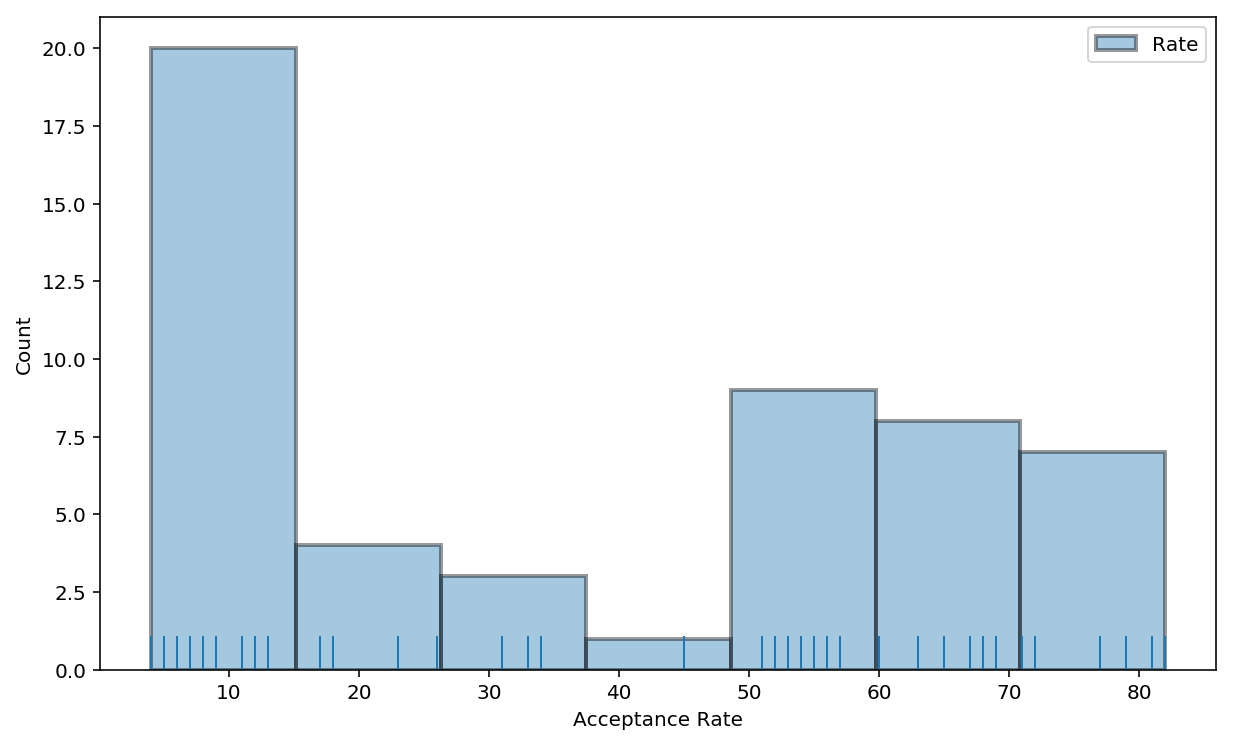

In [476]:
plt.figure(figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Acceptance Rate')
ss.distplot(np.array(df_file['Rate']), bins=int(np.sqrt(df_file['Rate'].count())), kde=False, label='Rate', 
            rug=True, hist_kws=dict(edgecolor="k", linewidth=2))
plt.legend()

In [477]:
# Stats of Math Scores
print('Skewness: ' + str(stats.skew(np.array(df_file['Math']))))
print('Median: ' + str(np.median(np.array(df_file['Math']))))
print('Mode: ' + str(stats.mode(np.array(df_file['Math']))))
df_file['Math'].describe()

Skewness: 0.166619376314
Median: 521.0
Mode: ModeResult(mode=array([499]), count=array([6]))


count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64

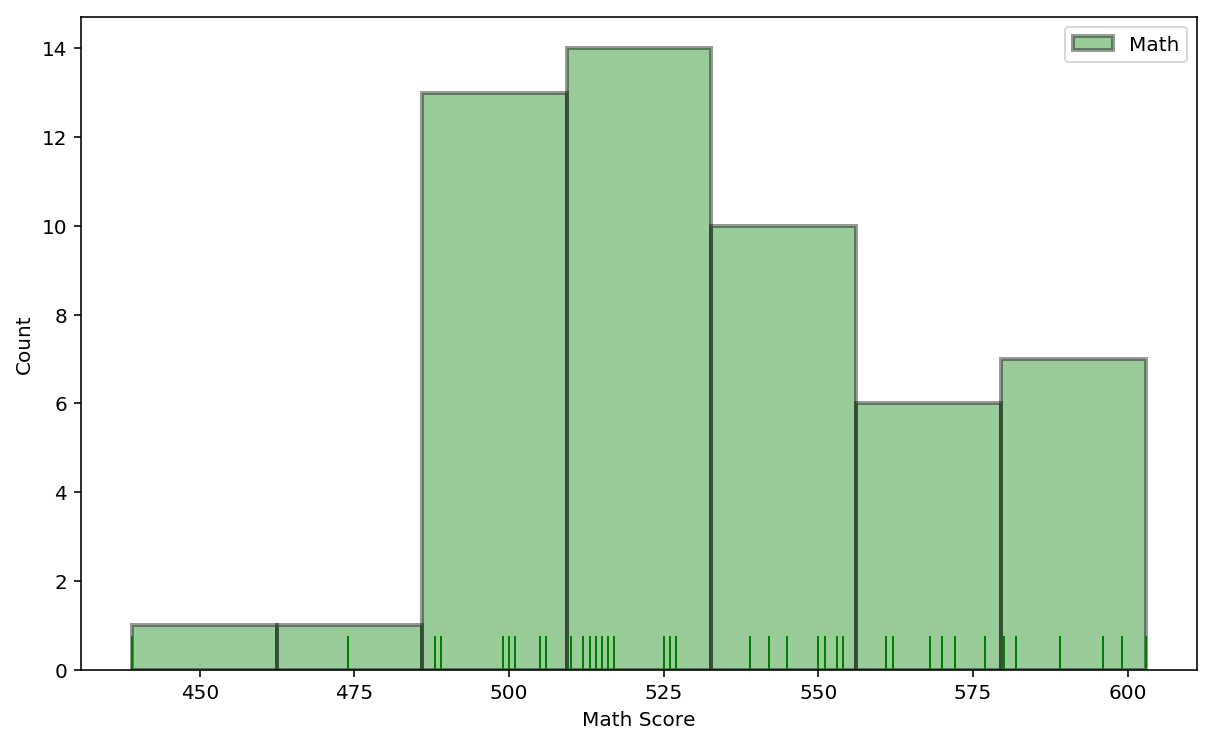

In [478]:
plt.figure(figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Math Score')
ss.distplot(np.array(df_file['Math']), bins=int(np.sqrt(df_file['Math'].count())), kde=False, label='Math', 
            hist_kws=dict(edgecolor="k", linewidth=2), rug=True, color='g')
plt.legend()

In [479]:
# Stats of Verbal Scores
print('Skewness: ' + str(stats.skew(np.array(df_file['Verbal']))))
print('Median: ' + str(np.median(np.array(df_file['Verbal']))))
print('Mode: ' + str(stats.mode(np.array(df_file['Verbal']))))
df_file['Verbal'].describe()

Skewness: 0.252741961702
Median: 526.5
Mode: ModeResult(mode=array([562]), count=array([3]))


count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

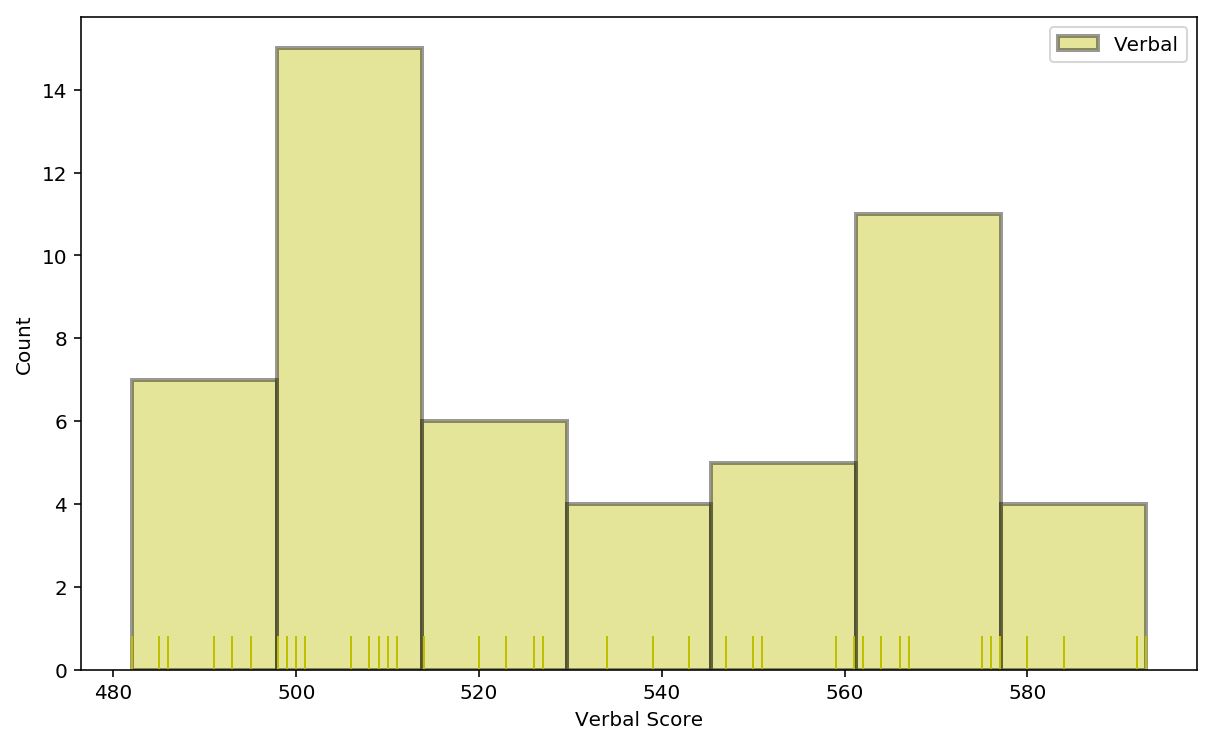

In [480]:
plt.figure(figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Verbal Score')
ss.distplot(np.array(df_file['Verbal']), bins=int(np.sqrt(df_file['Verbal'].count())), kde=False, label='Verbal', 
            hist_kws=dict(edgecolor="k", linewidth=2), rug=True, color='y')
plt.legend()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

### ANSWER

> The visualization displays the relationship between 'Rate', 'Math' and 'Verbal' variables.

> Individual variable distributions seem to be skewed and not normally distributed.

> 'Rate' generally has a negative linear relationship with both 'Math' and 'Verbal'.

> 'Math' and 'Verbal' generally have positive linear relationship with each other.

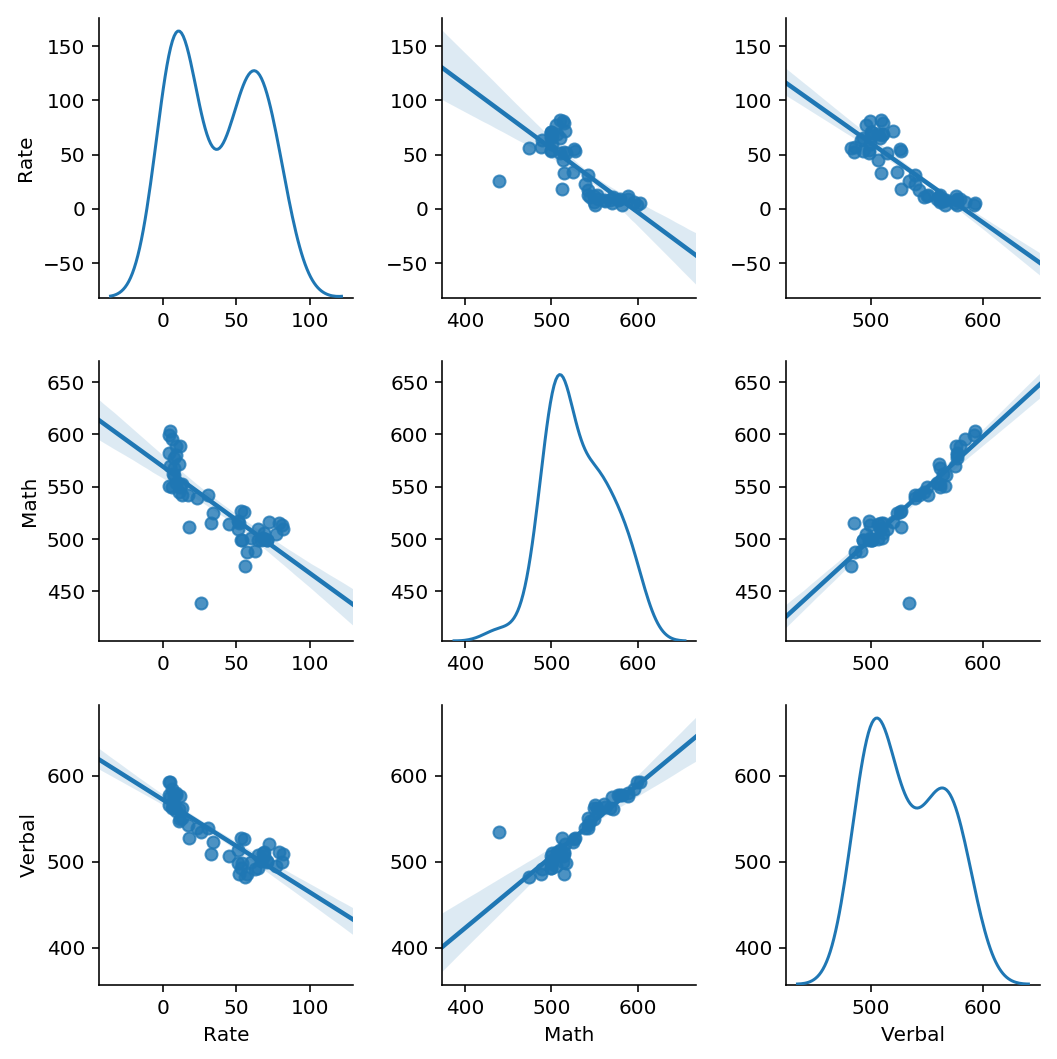

In [481]:
ss.pairplot(df_file[['Rate', 'Math', 'Verbal']], kind='reg', diag_kind='kde')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

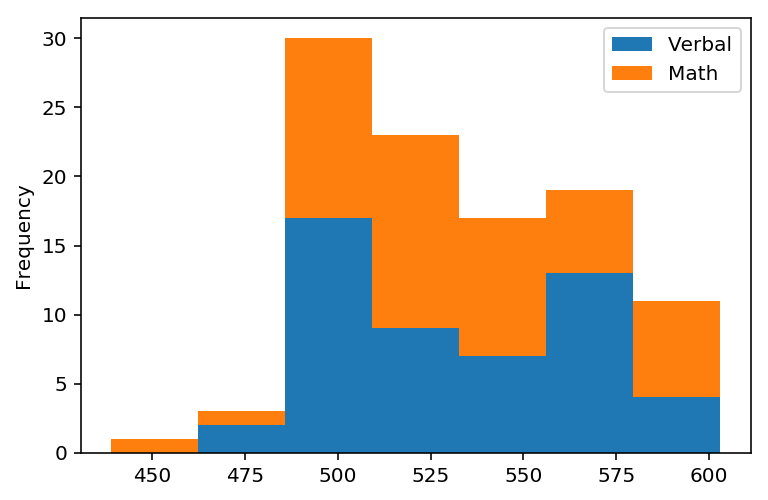

In [482]:
df_file[['Verbal', 'Math']].plot.hist(stacked=True, bins=int(np.sqrt(df_file['Verbal'].count())))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

### ANSWER

> 1. You can observe outliers, variances and differences in the distribution of data (median, interquartile range, maximum-minimum range) much easier with boxplots. i.e. we can tell that 'Verbal' has a smaller variance than 'Math'.

> 2. The 'Rate' dataset is on a much smaller scale than those of 'Math' & 'Verbal', making it hard for us to use it for comparison with the latter two. However we could plot 'Rate' on the same chart if we choose to normalize all the datasets.

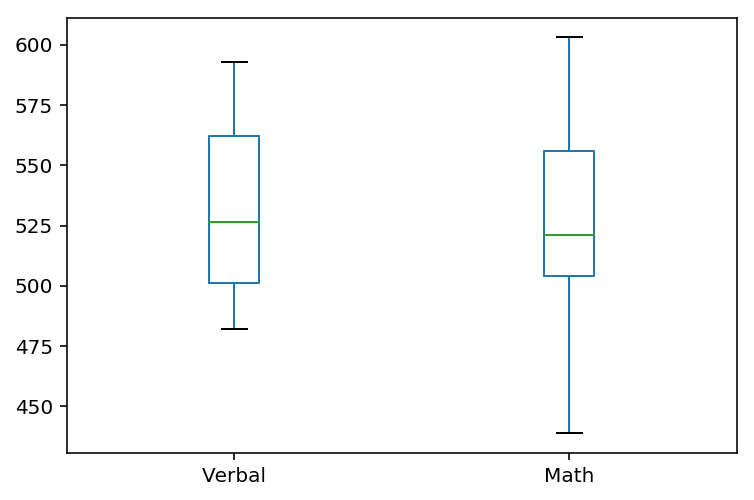

In [483]:
df_file[['Verbal', 'Math']].plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [484]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [485]:
# function to normalize dataset
def scaling_data(data):
    data = np.array(data)
    data_mean = data.mean()
    data_std = data.std()
    data_scaled = (data - data_mean)/data_std
    return data_scaled

In [486]:
# plotting boxplots using plotly
verbal_box = go.Box(
    y=scaling_data(df_file['Verbal']),
    name='Verbal',
    marker=dict(
        color='#3D9970'
    ),
    boxmean='sd',
    boxpoints ='outliers',
    line = dict(
        color ='green')
)

math_box = go.Box(
    y=scaling_data(df_file['Math']),
    name='Math',
    marker=dict(
        color='blue'
    ),
    boxmean='sd',
    boxpoints ='outliers',
    line = dict(
        color ='blue')
)

rate_box = go.Box(
    y=scaling_data(df_file['Rate']),
    name='Rate',
    marker=dict(
        color='yellow'
    ),
    boxmean='sd',
    boxpoints ='outliers',
    line = dict(
        color ='orange')
)

data = [verbal_box, math_box, rate_box]

layout = go.Layout(
    title='I used z-score to normalize them so that they can be on the same scale.' 
        '<br>'
        'However z-score does not convert the data into standard normal distributions.'
        '<br>'
        'Therefore, standard normal rules cannot be applied here.',
    titlefont=dict(
        size=15
    ),
    yaxis=dict(
        title='Normalized Variables',
        zeroline=True
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




### ANSWER

> 24 States are above the mean

> Since less than 50% of the scores lies on the right of the mean, the 'Verbal' scores are right skewed, as the mass of the distribution is leaning towards the left.

In [487]:
# percentage of verbal scores above mean
float(len(df_file[df_file['Verbal'] > df_file['Verbal'].mean()])) / float(len(df_file['Verbal']))

0.46153846153846156

In [488]:
# Number of verbal scores above mean
len(df_file[df_file['Verbal'] > df_file['Verbal'].mean()])

24

In [489]:
# List of verbal scores above mean
df_file[df_file['Verbal'] > df_file['Verbal'].mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

### ANSWER

> There are 2 more states greater than the median as compared to the mean.

> Exactly 50% of the verbal scores are greater than the median. This is because in a right skewed distribution, the median is smaller than the mean.

In [490]:
# Percentage of Verbal scores above median
float(len(df_file[df_file['Verbal'] > df_file['Verbal'].median()])) / float(len(df_file['Verbal']))

0.5

In [491]:
# Number of Verbal scores above median
len(df_file[df_file['Verbal'] > df_file['Verbal'].median()])

26

In [492]:
# List of Verbal scores above median
df_file[df_file['Verbal'] > df_file['Verbal'].median()]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [493]:
df_file['Diff_verbal_math'] = abs(np.array(df_file['Verbal']) - np.array(df_file['Math']))
df_file

,State,Rate,Verbal,Math,Diff_verbal_math
0,CT,82,509,510,1
1,NJ,81,499,513,14
2,MA,79,511,515,4
3,NY,77,495,505,10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [494]:
# First DataFrame
df_top_10_verbal_bigger_math = df_file[df_file['Verbal'] > df_file['Math']]

In [495]:
# Second DataFrame
df_top_10_math_bigger_verbal = df_file[df_file['Math'] > df_file['Verbal']]

In [496]:
# Print Verbal bigger than Math top ten
df_top_10_verbal_bigger_math.sort_values(by='Diff_verbal_math', ascending=False).head(10)

,State,Rate,Verbal,Math,Diff_verbal_math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
41,OK,8,567,561,6
8,ME,69,506,500,6


In [497]:
# Print Math bigger than Verbal top ten
df_top_10_math_bigger_verbal.sort_values(by='Diff_verbal_math', ascending=False, ).head(10)

,State,Rate,Verbal,Math,Diff_verbal_math
21,HI,52,485,515,30
23,CA,51,498,517,19
1,NJ,81,499,513,14
33,IL,12,576,589,13
44,WI,6,584,596,12
36,MI,11,561,572,11
3,NY,77,495,505,10
47,IA,5,593,603,10
37,MN,9,580,589,9
51,All,45,506,514,8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


### ANSWER

> It tells me that 'Rate' is negatively correlated with both 'Verbal' and 'Math'.

> It tells that 'Verbal' and 'Math' are positively correlated with one another.

In [498]:
correlation = df_file[['Rate', 'Verbal', 'Math']].corr(method='pearson')
correlation

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


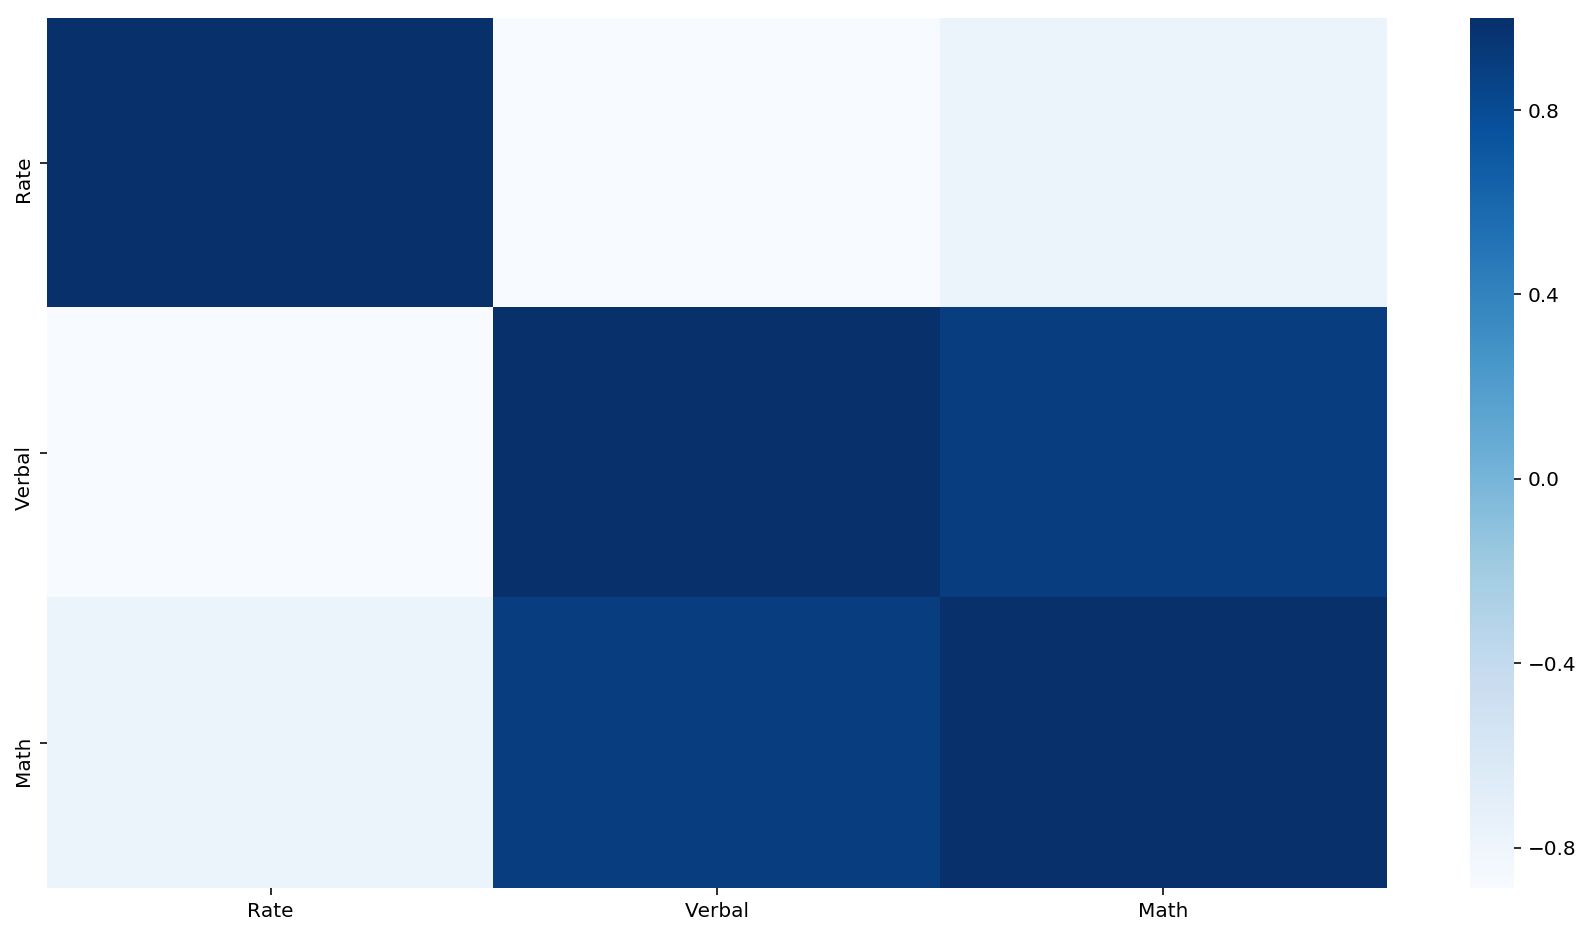

In [499]:
fig, ax = plt.subplots(figsize=(15,8))  
ss.heatmap(correlation, cmap="Blues", ax=ax)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

### ANSWER

> * **count:** *This row indicates the number of datapoints in the column*
> * **mean:** *This row indicates the average of all the datapoints in the column*
> * **std:** *This row indicates the average difference of the datapoints from the mean of the column*
> * **min:** *This row indicates the minimum datapoint in the column*
> * **25%:** *This row indicates the 25th percentile datapoint in the column. 25% of the datapoints in the column are lower than this datapoint*
> * **50%:** *This row indicates the 50th percentile datapoint in the column. 50% of the datapoints in the column are lower than this datapoint*
> * **75%:** *This row indicates the 75th percentile datapoint in the column. 75% of the datapoints in the column are lower than this datapoint*
> * **max:** *This row indicates the maximum datapoint in the column*

In [500]:
df_file.describe()

,Rate,Verbal,Math,Diff_verbal_math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,7.903846
std,27.301788,33.236225,36.014975,13.565035
min,4.000000,482.000000,439.000000,0.000000
25%,9.000000,501.000000,504.000000,2.000000
50%,33.500000,526.500000,521.000000,5.000000
75%,63.500000,562.000000,555.750000,9.000000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

### ANSWER

> 1. The covariance matrix has much more **variation in values** than the correlation matrix because it does not standardize values, making it very hard to compare linear relationships between different sets of two variables. The shortfall of the covariance matrix can be clearly seen when we plot different variables against itself. E.G. We cannot tell from the covariance whether the relationship between 'Rate' and itself, and 'Verbal' and itself are the same, **although they should be the same (they should be equals to 1)**, because the numbers are different.

> 2. By normalizing the covariance via **dividing the covariance by the product of the individual standard deviation of the two variables.**

> 3. Since correlation output will always have a constant range between 1 to -1, it **enables fair comparison** of relationships between different sets of two variables.

In [501]:
covariance = df_file[['Rate', 'Verbal', 'Math']].cov()
covariance

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

### ANSWER

> We can shorten the headers by providing abbreviations

> Yes, the following columns needs to be cleaned and converted into float data type:
    
> 1. **cocaine-frequency:** *Replace '-' on row 16 with 0*
> 2. **crack-frequency:** *Replace '-' on row 0,2,16 with 0*
> 3. **heroin-frequency:** *Replace '-' on row 1 with 0*
> 4. **inhalant-frequency:** *Replace '-' on row 16 with 0*
> 5. **oxycontin-frequency:** *Replace '-' on row 16 with 0*
> 6. **meth-frequency:** *Replace '-' on row 0,16 with 0*

> Column **'age'** does not need cleaning as it is a categorical variable

> Column **'n'** does not need cleaning as it represents number of people in the age group, converting them to float will not make sense. **i.e. You cant have 0.1 of a person**

> All the other columns should be in float.

> There are variables missing as highlighted above. After examining the dataset, i decided to replace them with 0. The reason is because all of their respective usage is 0. Thus we can infer that they are most likely **not** being randomly fed with a '-' value.

> In light of this, some parts of the data does not make sense. For example, for age 13, percentage of people who use crack is 0, however the median number of times crack is used is 3 when it should be 0 instead. **If there is no one using crack, how can there be a frequency of usage!**

In [502]:
# read raw from github
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'
drug_df = pd.read_csv(url)

In [503]:
# check info of drug use dataframe
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [504]:
# shorten headers
old_headers = drug_df.columns

new_headers = {x:x.split('-')[0][:3] + '_u' if i % 2 == 0 else x.split('-')[0][:3] + '_f' for i, x in enumerate(old_headers) if len(x) > 4}
drug_df.rename(columns=new_headers, inplace=True)

In [505]:
# define function to replace '-' with float
def ele_to_float(element):
    if element == '-':
        element = float(0)
        return element
    else:
        element = float(element)
        return element

In [506]:
# clean up columns mentioned above
drug_df.loc[:, (drug_df.columns != 'age') & (drug_df.columns != 'n')] = drug_df.loc[:, (drug_df.columns != 'age') & (drug_df.columns != 'n')].applymap(ele_to_float)

In [507]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age      17 non-null object
n        17 non-null int64
alc_u    17 non-null float64
alc_f    17 non-null float64
mar_u    17 non-null float64
mar_f    17 non-null float64
coc_u    17 non-null float64
coc_f    17 non-null float64
cra_u    17 non-null float64
cra_f    17 non-null float64
her_u    17 non-null float64
her_f    17 non-null float64
hal_u    17 non-null float64
hal_f    17 non-null float64
inh_u    17 non-null float64
inh_f    17 non-null float64
pai_u    17 non-null float64
pai_f    17 non-null float64
oxy_u    17 non-null float64
oxy_f    17 non-null float64
tra_u    17 non-null float64
tra_f    17 non-null float64
sti_u    17 non-null float64
sti_f    17 non-null float64
met_u    17 non-null float64
met_f    17 non-null float64
sed_u    17 non-null float64
sed_f    17 non-null float64
dtypes: float64(26), int64(1), object(1)
memory usage: 3.8+ KB


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### AIM
> Investigate Prevalence of Drugs across all ages / as age increases

> Investigate Relationship between Drugs across all ages / as age increases

> Any Other Interesting Relationships

In [508]:
# Separate uses from frequency
freq_list = [header for header in drug_df.columns if '_f' in header]
uses_list = [header for header in drug_df.columns if '_u' in header]
drug_df_uses = drug_df.drop(columns=freq_list)
drug_df_freq = drug_df.drop(columns=uses_list)

In [509]:
# Get total consumption for each drug by age
all_drugs_uses = drug_df_uses.loc[:, (drug_df_uses.columns != 'age') & (drug_df_uses.columns != 'n')]
all_drugs_uses_n = all_drugs_uses.apply(lambda x: np.round(drug_df['n'].median() * x / 100))
all_drugs_freq = drug_df_freq.loc[:, (drug_df_uses.columns != 'age') & (drug_df_uses.columns != 'n')]

for i, (header_u, header_f) in enumerate(zip(all_drugs_uses_n.columns, all_drugs_freq.columns)):
    if i == 0:
        result = all_drugs_uses_n[header_u] * all_drugs_freq[header_f]
        df = pd.DataFrame(result, columns=[header_u[:3]])
    else:
        result = all_drugs_uses_n[header_u] * all_drugs_freq[header_f]
        result = pd.DataFrame(result, columns=[header_u[:3]])
        df = pd.concat([df, result], axis=1)

drug_df_consumption = pd.concat([drug_df['age'], df], axis=1)
drug_df_consumption.set_index('age', drop=True, inplace=True)
all_drugs_uses_n.set_index(drug_df['age'], drop=True, inplace=True)
all_drugs_freq.set_index(drug_df['age'], drop=True, inplace=True)

In [510]:
# # Scaling by range
# def scale_by_range(col):
#     col_scaled = np.array(col)
#     col_range = np.ptp(col_scaled)
#     col_scaled = (col_scaled - col_scaled.mean())/col_range
#     return col_scaled

### Observations for Total Drug Consumption by age group

> Total Drug consumption distribution as age increases is negatively skewed.

> Consumption median is larger than mean

> Consumption peaks around age 21

In [511]:
drug_df_consumption.loc[:,'alc':].sum(axis=1).describe()

count        17.000000
mean      97708.617647
std       65463.660814
min        4231.000000
25%       33905.500000
50%      112787.000000
75%      155041.000000
max      177537.000000
dtype: float64

In [512]:
stats.skew(drug_df_consumption.loc[:,'alc':].sum(axis=1))

-0.2432518968721786

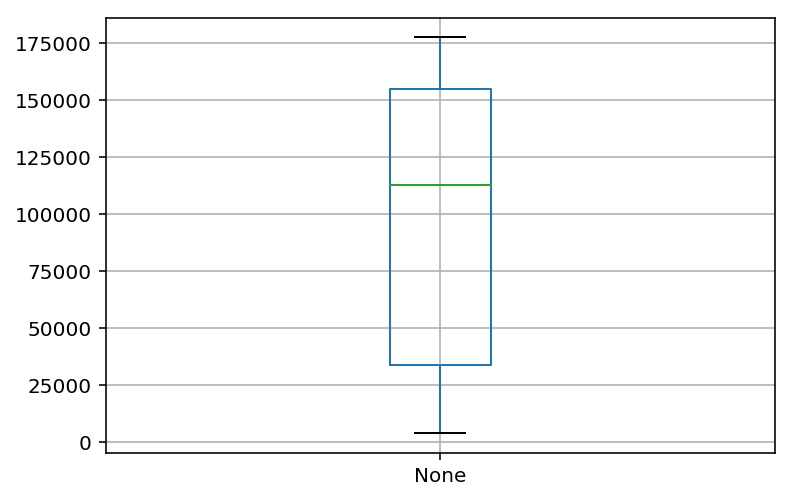

In [513]:
drug_df_consumption.loc[:,'alc':].sum(axis=1).plot(kind='box', grid=True)

Text(0,0.5,u'Total Drug Consumption')

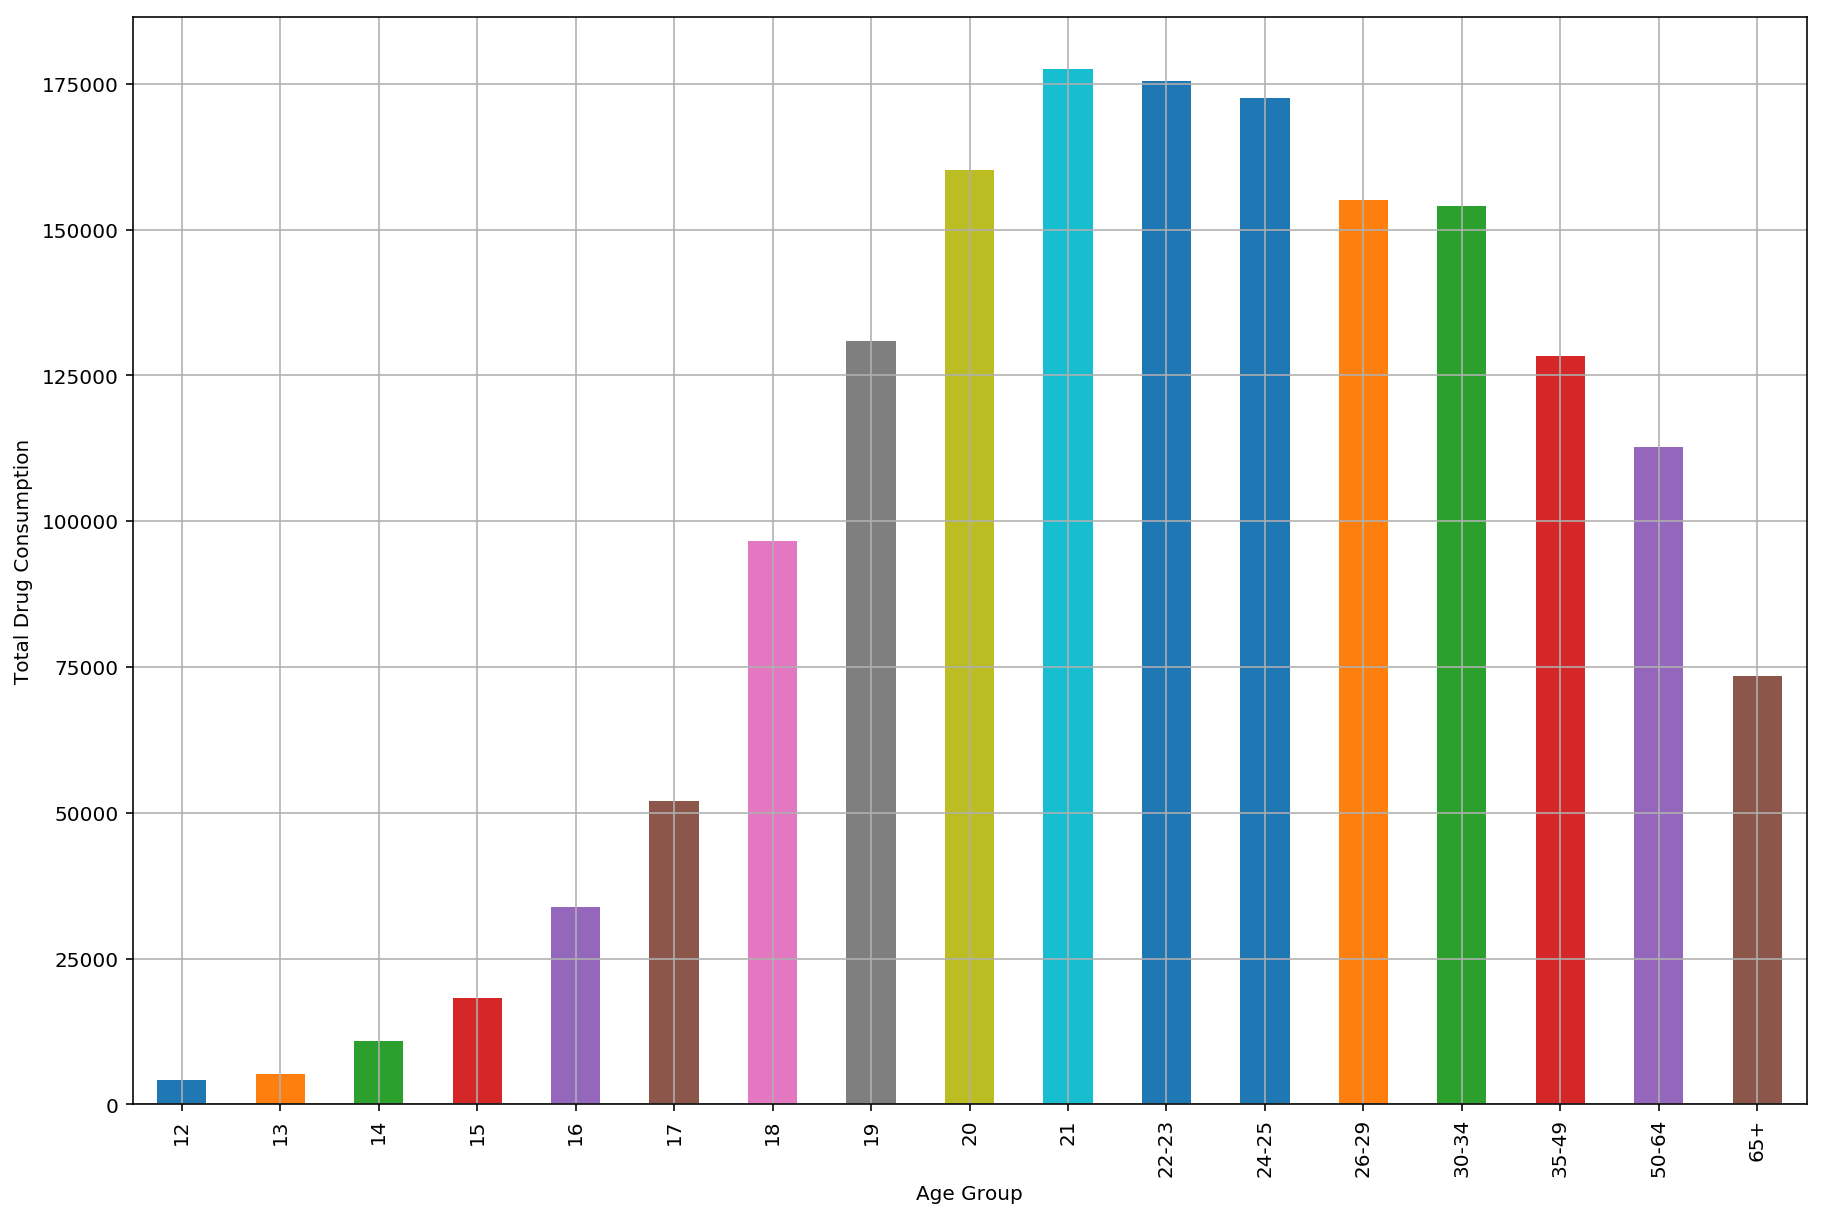

In [514]:
# Total Consumption Statistics
dc = drug_df_consumption.loc[:,'alc':].sum(axis=1).plot(figsize=(15, 10), kind='bar', grid=True)
dc.set_xlabel('Age Group')
dc.set_ylabel('Total Drug Consumption')

### Observations for Total Drug Consumption Per Drug

> Top 5 Drugs based on total consumption: 
1. Alcohol 
2. marijuana 
3. pain-releiver 
4. tranquilizer
5. heroin

Text(0,0.5,u'Total Consumption')

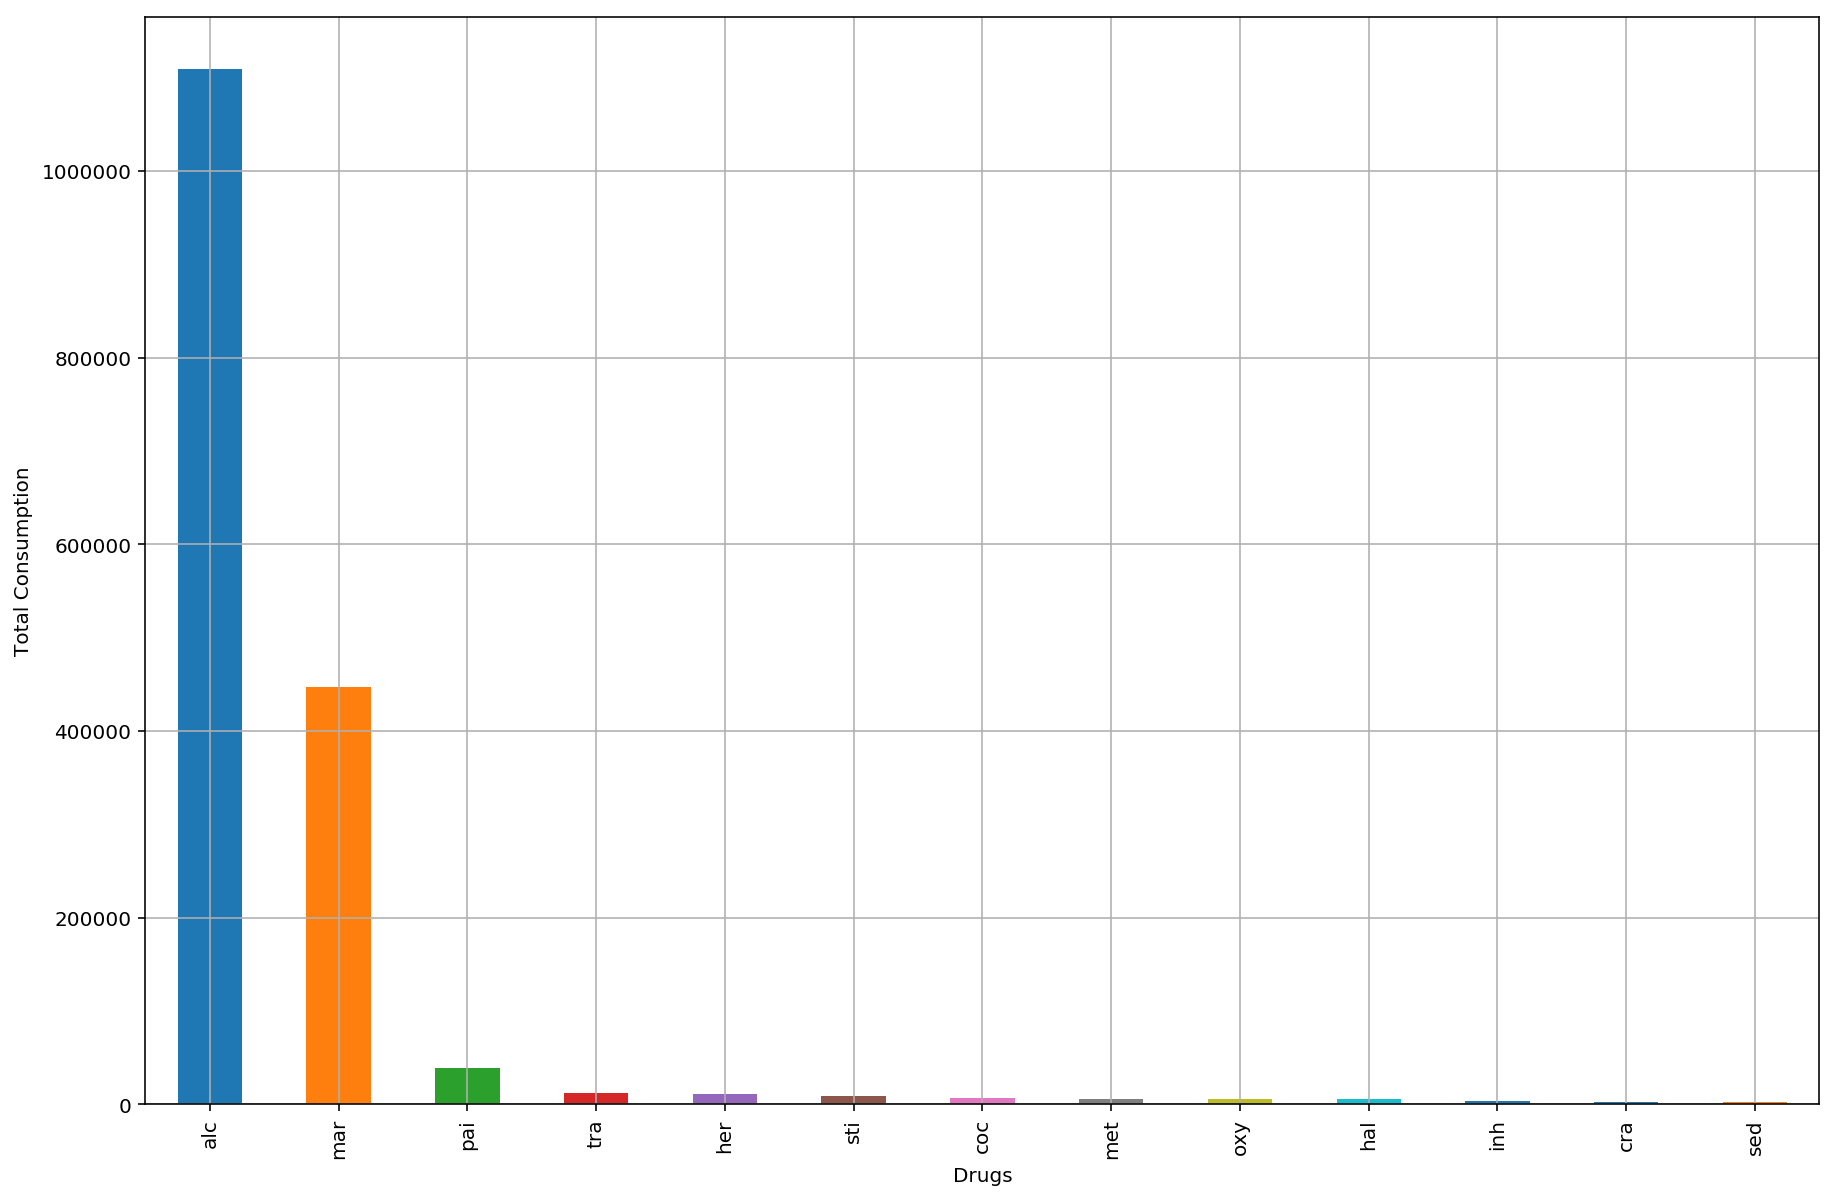

In [515]:
# Total Consumption Statistics
dc = drug_df_consumption.loc[:,'alc':].sum().sort_values(ascending=False).plot(figsize=(15, 10), kind='bar', grid=True)
dc.set_xlabel('Drugs')
dc.set_ylabel('Total Consumption')

### Trend for Drug Consumption as age increases

> Top 5 drugs consumed generally follow a similar trend

> They peak around age 18 - 23, thereafter starts to enter a downtrend as age increases

> Inhalant is the only drug that enters a perpetual downtrend in consumption as age increases



Text(0,0.5,u'Top 5 Drug Consumption with Inhalant')

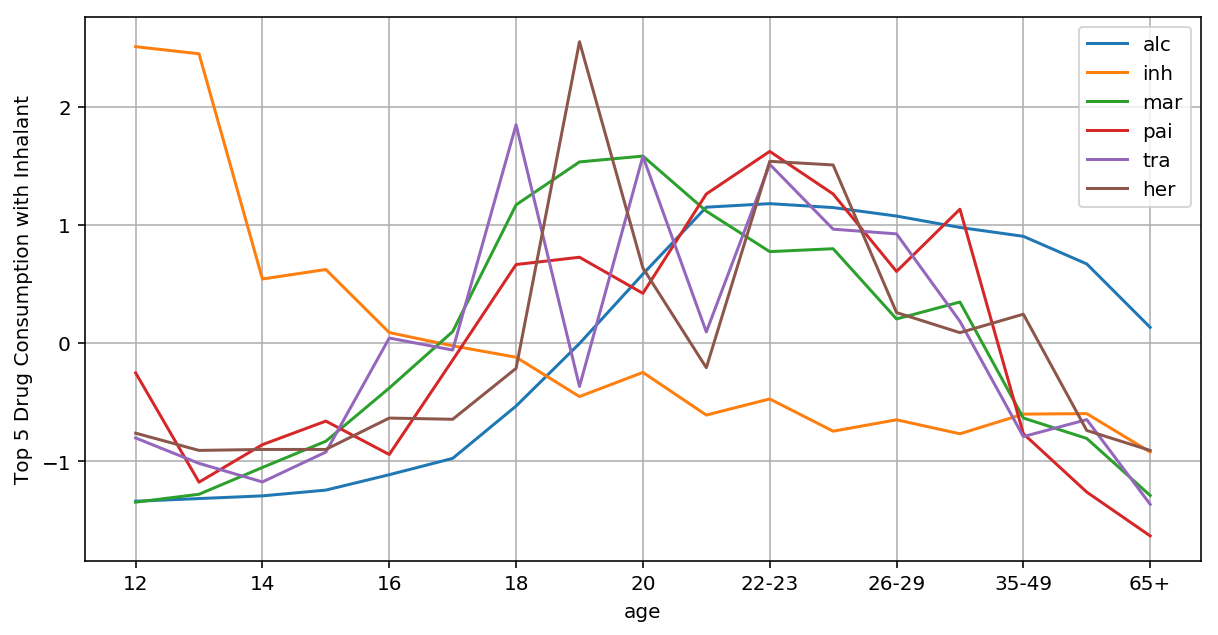

In [516]:
d_cons_sub = drug_df_consumption[['alc', 'inh', 'mar', 'pai', 'tra', 'her']].apply(scaling_data).plot(figsize=(10, 5), kind='line', grid=True)
d_cons_sub.set_ylabel('Top 5 Drug Consumption with Inhalant')

Text(0,0.5,u'Other Drug Consumption')

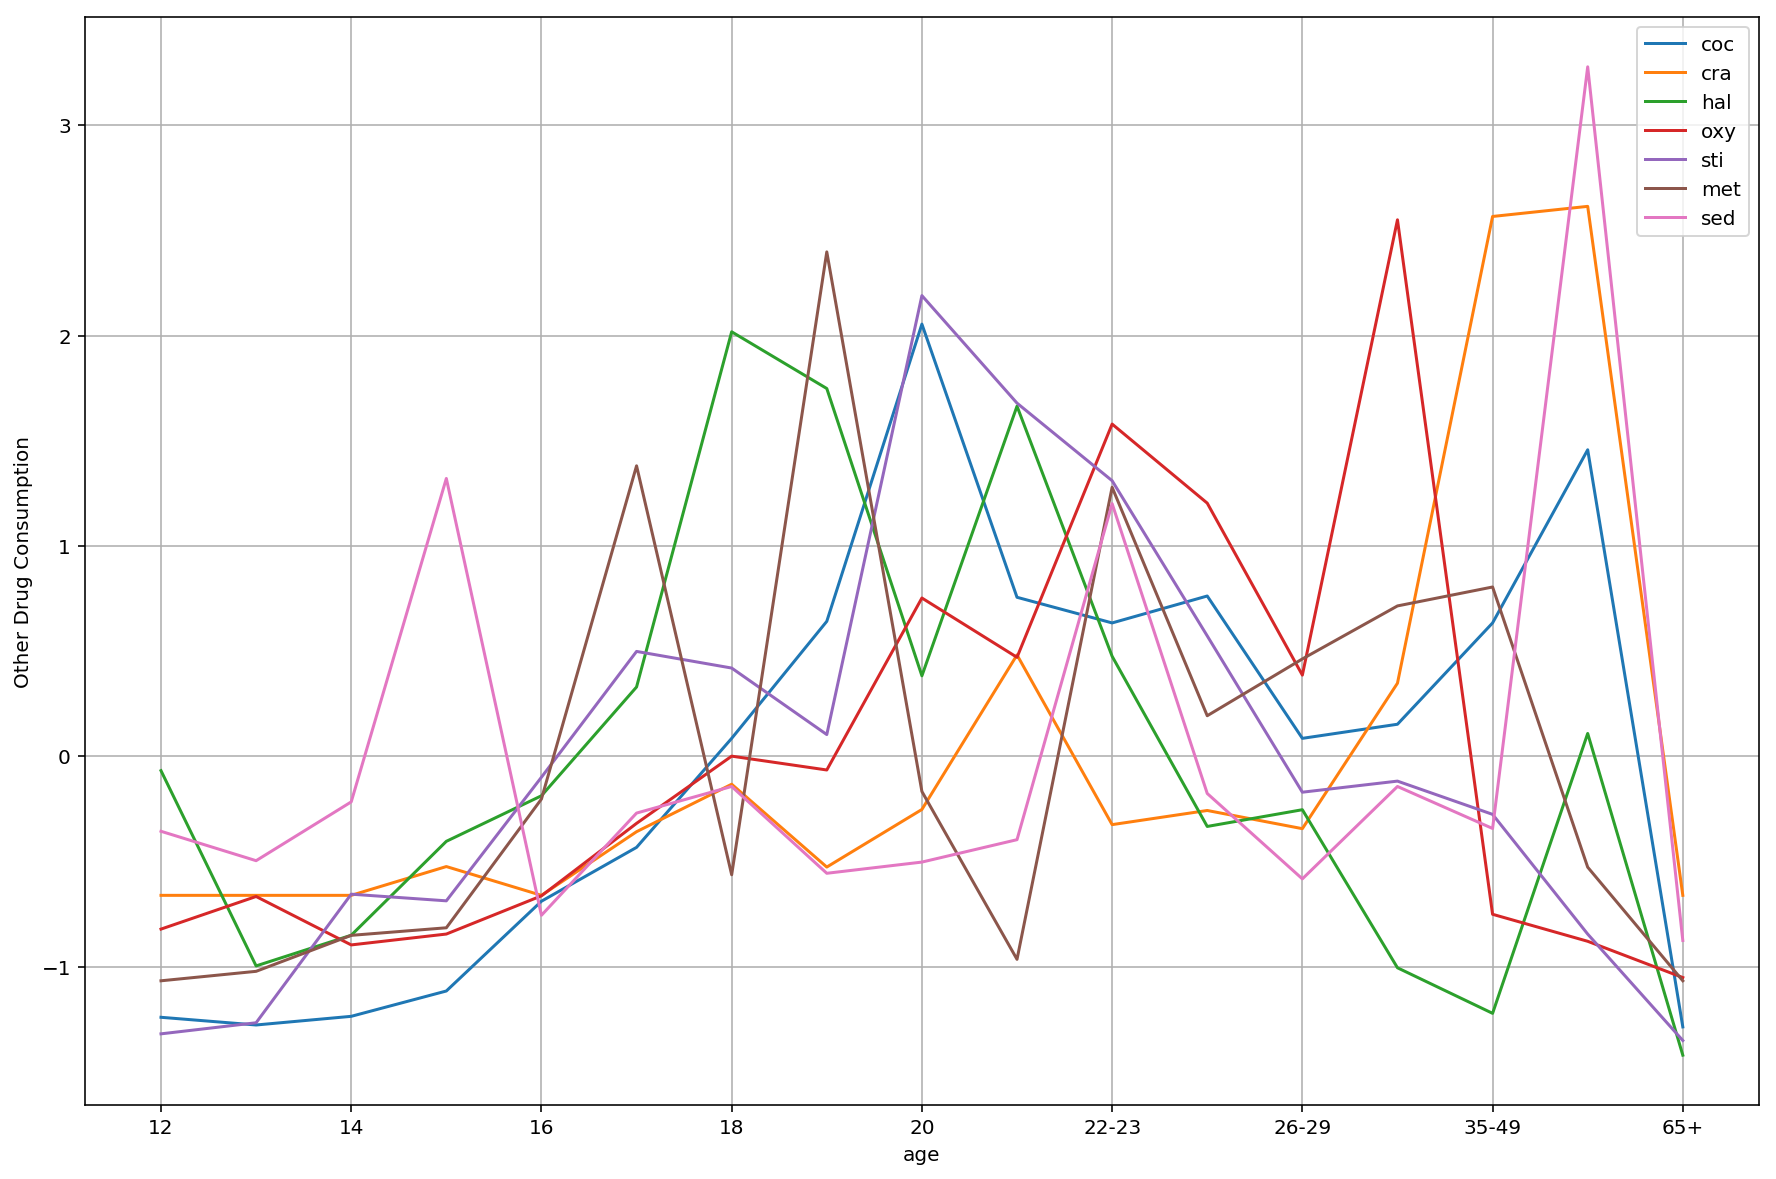

In [517]:
# Drug Consumption trend
cols = [col for col in drug_df_consumption.columns if col not in ['alc', 'inh', 'mar', 'pai', 'tra', 'her']]
d_cons = drug_df_consumption[cols].apply(scaling_data).plot(figsize=(15, 10), kind='line', grid=True)
d_cons.set_ylabel('Other Drug Consumption')

### Correlation between Total Drug Consumption for all Drugs as age increases

> Inhalant consumption has negative correlation with all other drugs

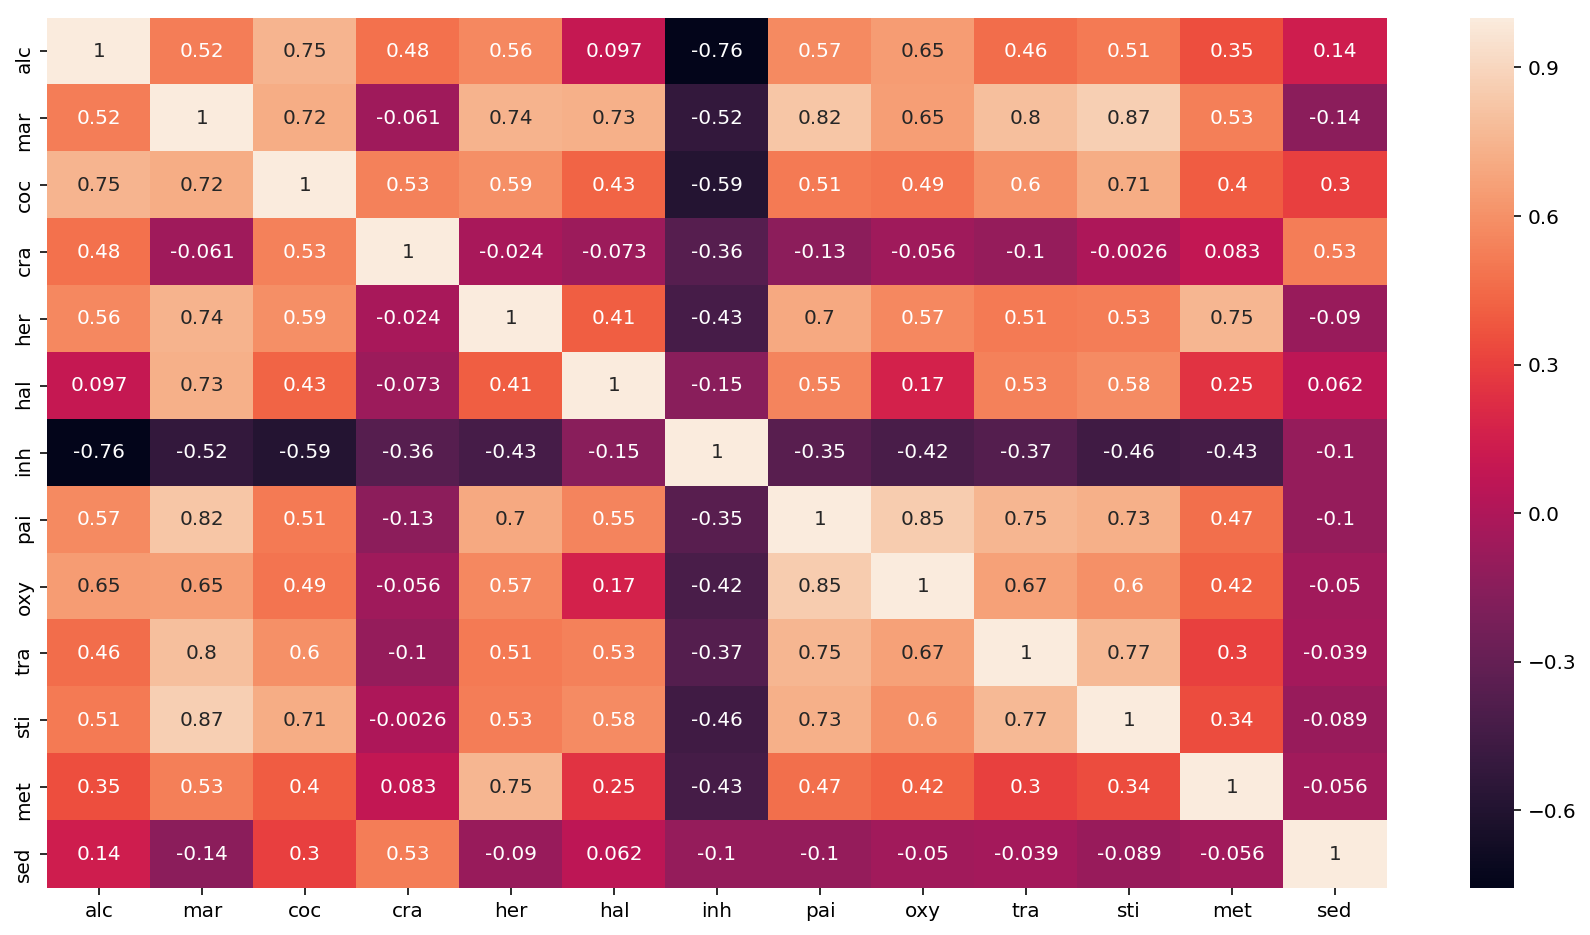

In [518]:
fig, ax = plt.subplots(figsize=(15,8))  
ss.heatmap(drug_df_consumption.corr(), annot=True, ax=ax)

### Observations for Total Drug Users Per Drug

> Top 5 Drugs with most number of users:
1. Alcohol 
2. Marijuana 
3. Pain-releiver 
4. Hallucinogen 
5. Tranquilizer
 

Text(0.5,1,u'Number of Drug Users per Drug')

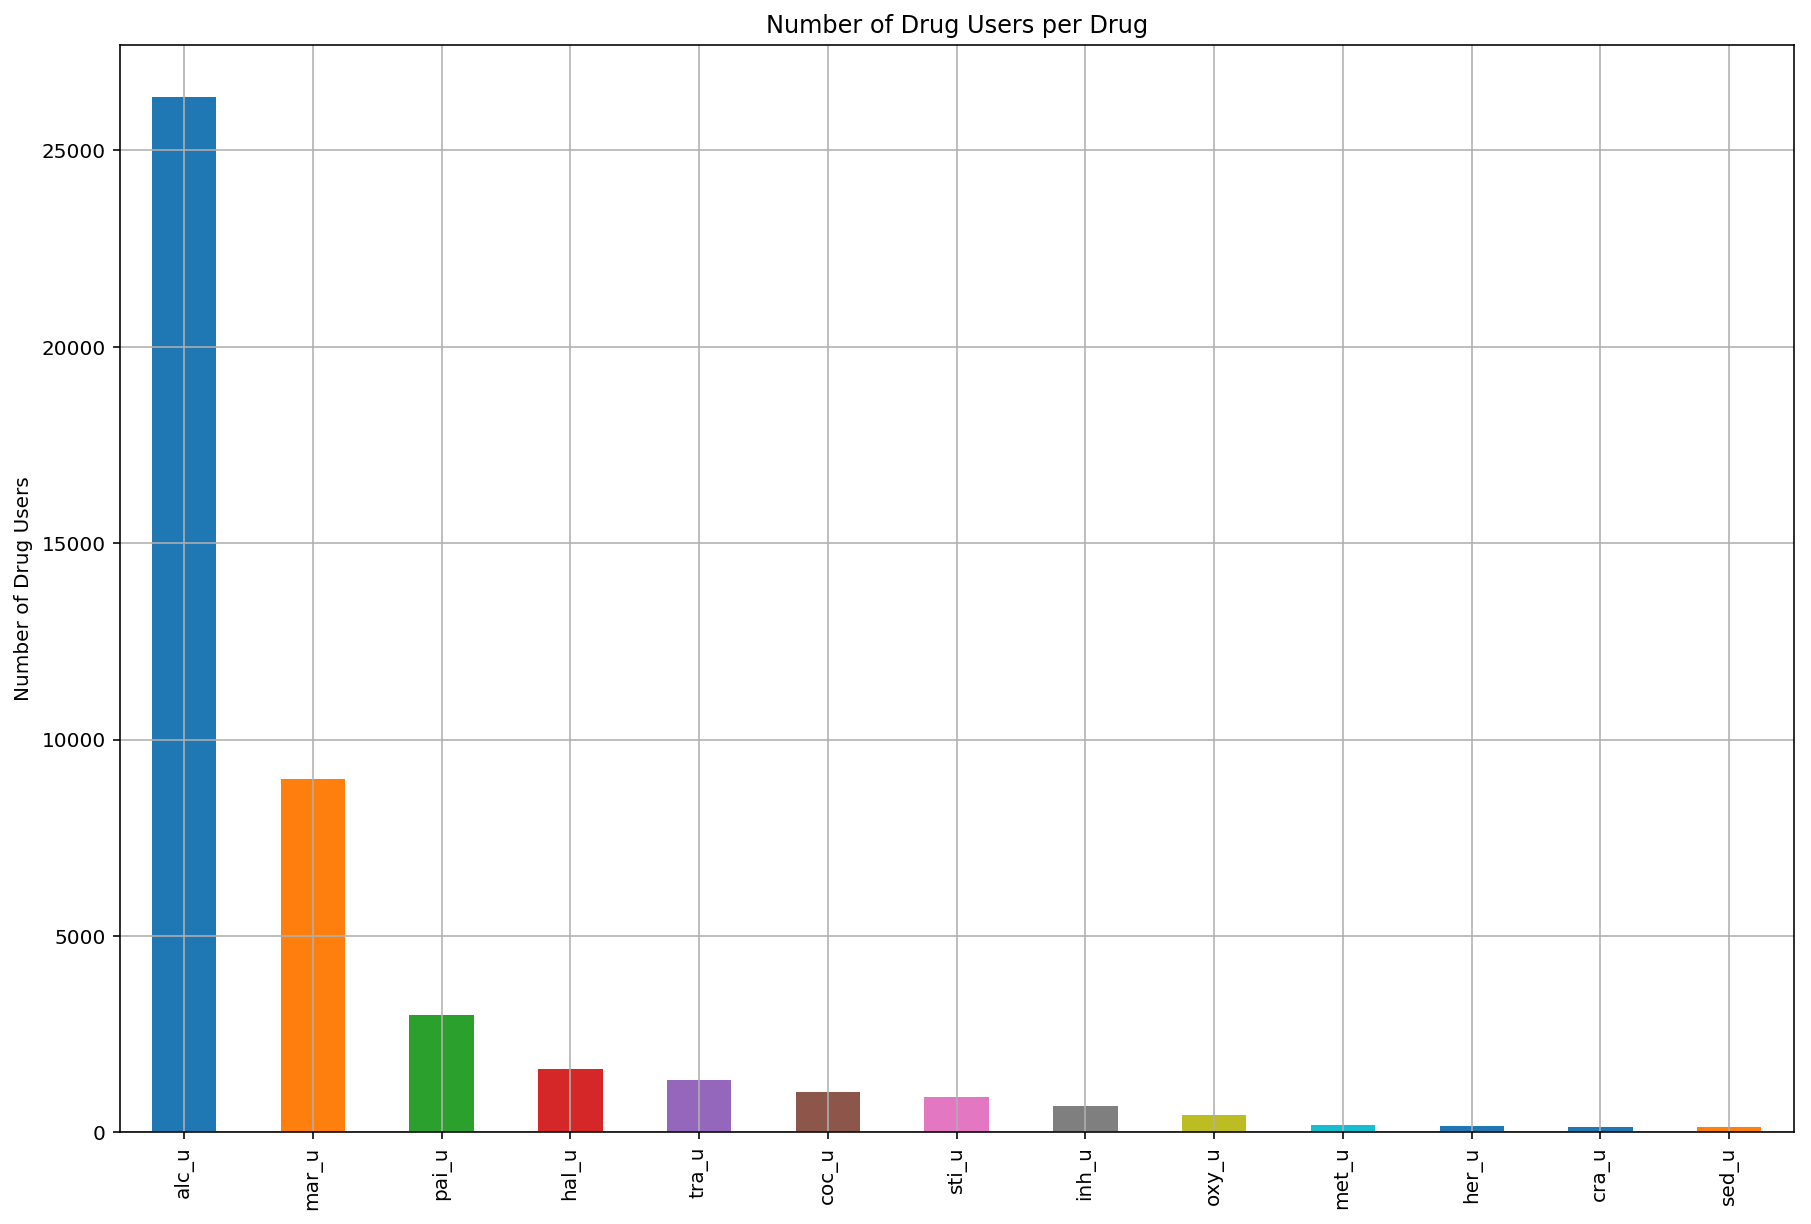

In [519]:
# Drug users by age group
du = all_drugs_uses_n.loc[:, all_drugs_uses_n.columns != 'age'].sum().sort_values(ascending=False).plot(figsize=(15, 10), kind='bar', grid=True)
du.set_ylabel('Number of Drug Users')
du.set_title('Number of Drug Users per Drug')

### Trend for Drug Users as age increases

> 1. From **age 12 - 21**, users for each drug is **generally increasing** and thereafter starts **decreasing from age 21 - 65+**

> 2. **Except for inhalant drug**, which enters an **increasing trend from age 12 - 16** and thereafter starts **decreasing from age 16 - 65+**
 

Text(0,0.5,u'Number of Drug Users')

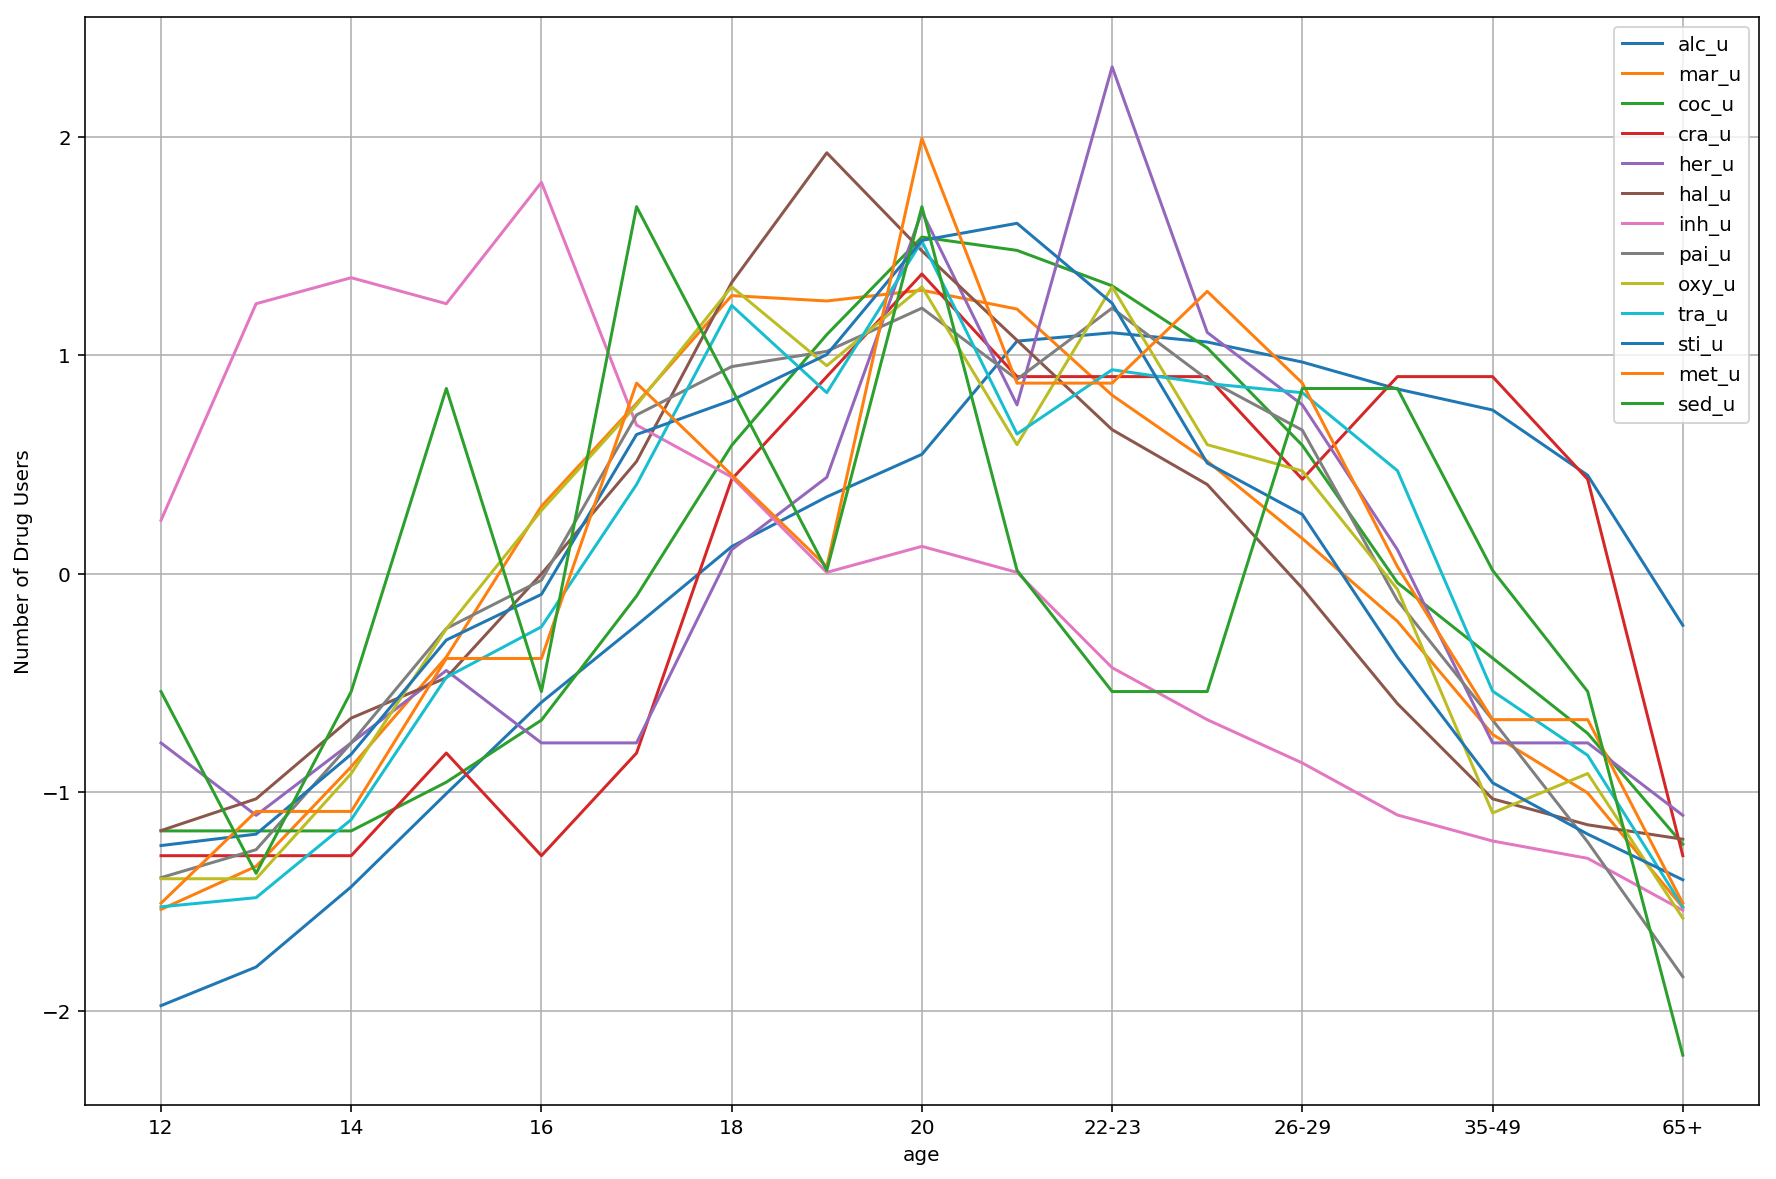

In [520]:
# Drug users by age group trend
du = all_drugs_uses_n.loc[:, all_drugs_uses_n.columns != 'age'].apply(scaling_data).plot(figsize=(15, 10), kind='line', grid=True)
du.set_ylabel('Number of Drug Users')

### Correlation between number of Drug Users per Drug as age increases

> Most Drugs are positively correlated with one another except for inhalant.


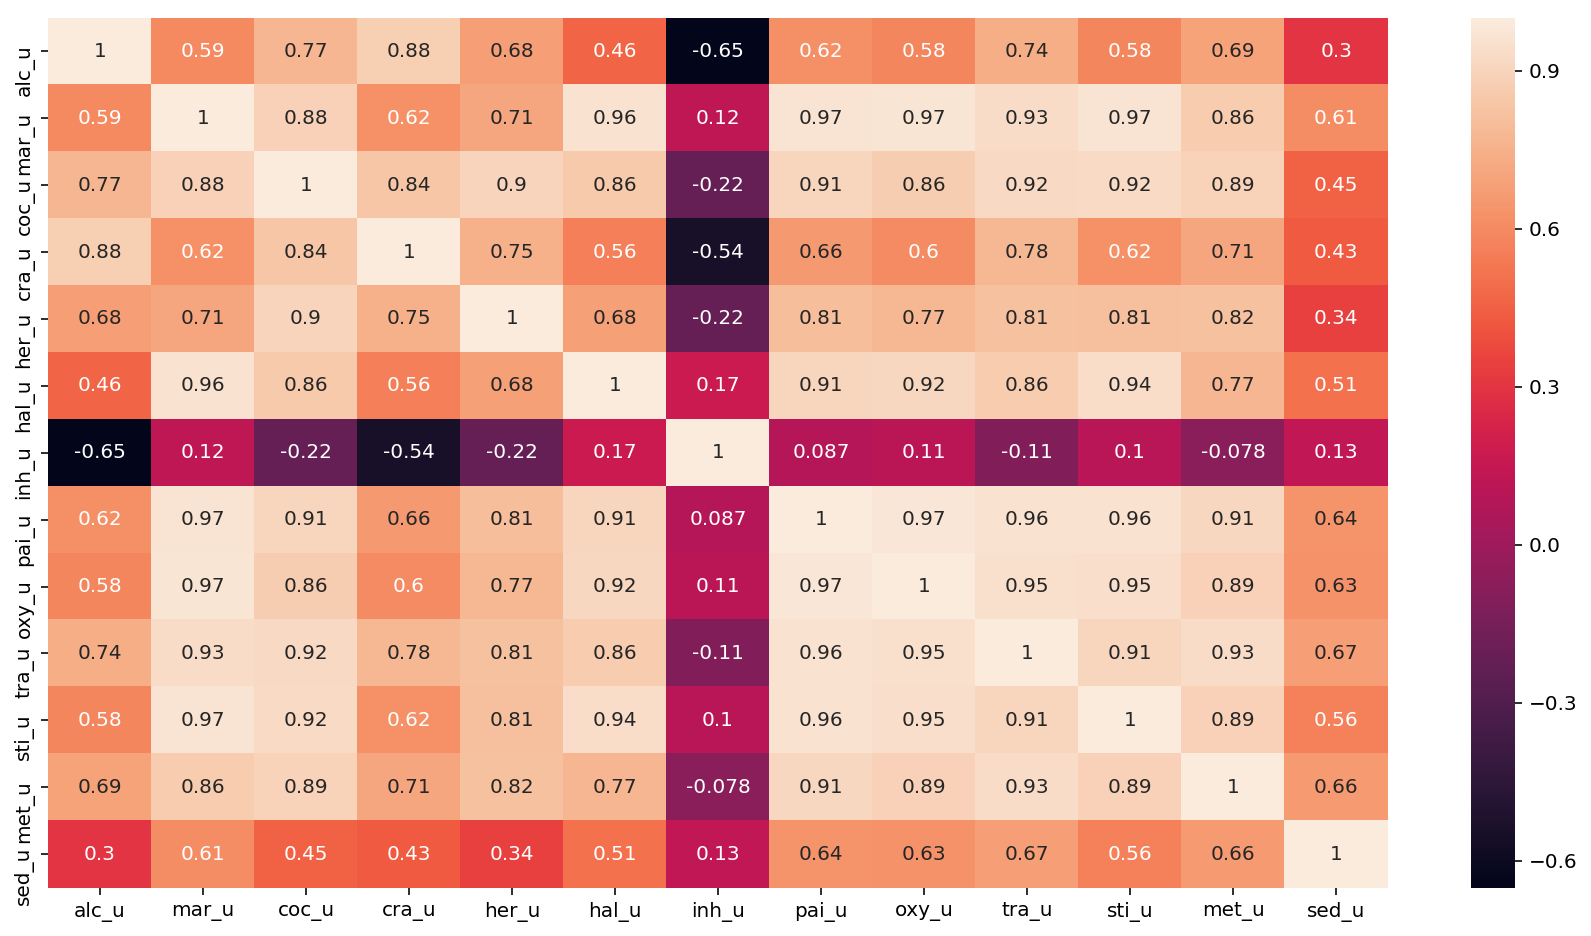

In [521]:
fig, ax = plt.subplots(figsize=(15,8))  
ss.heatmap(all_drugs_uses_n.corr(), annot=True, ax=ax)

### Observations for Total Frequency per person per Drug

> Top 5 Frequency Drugs:
1. Heroin
2. Marijuana
3. Alcohol
4. Meth
5. Stimulant

Text(0,0.5,u'Total Frequency per Drug per person')

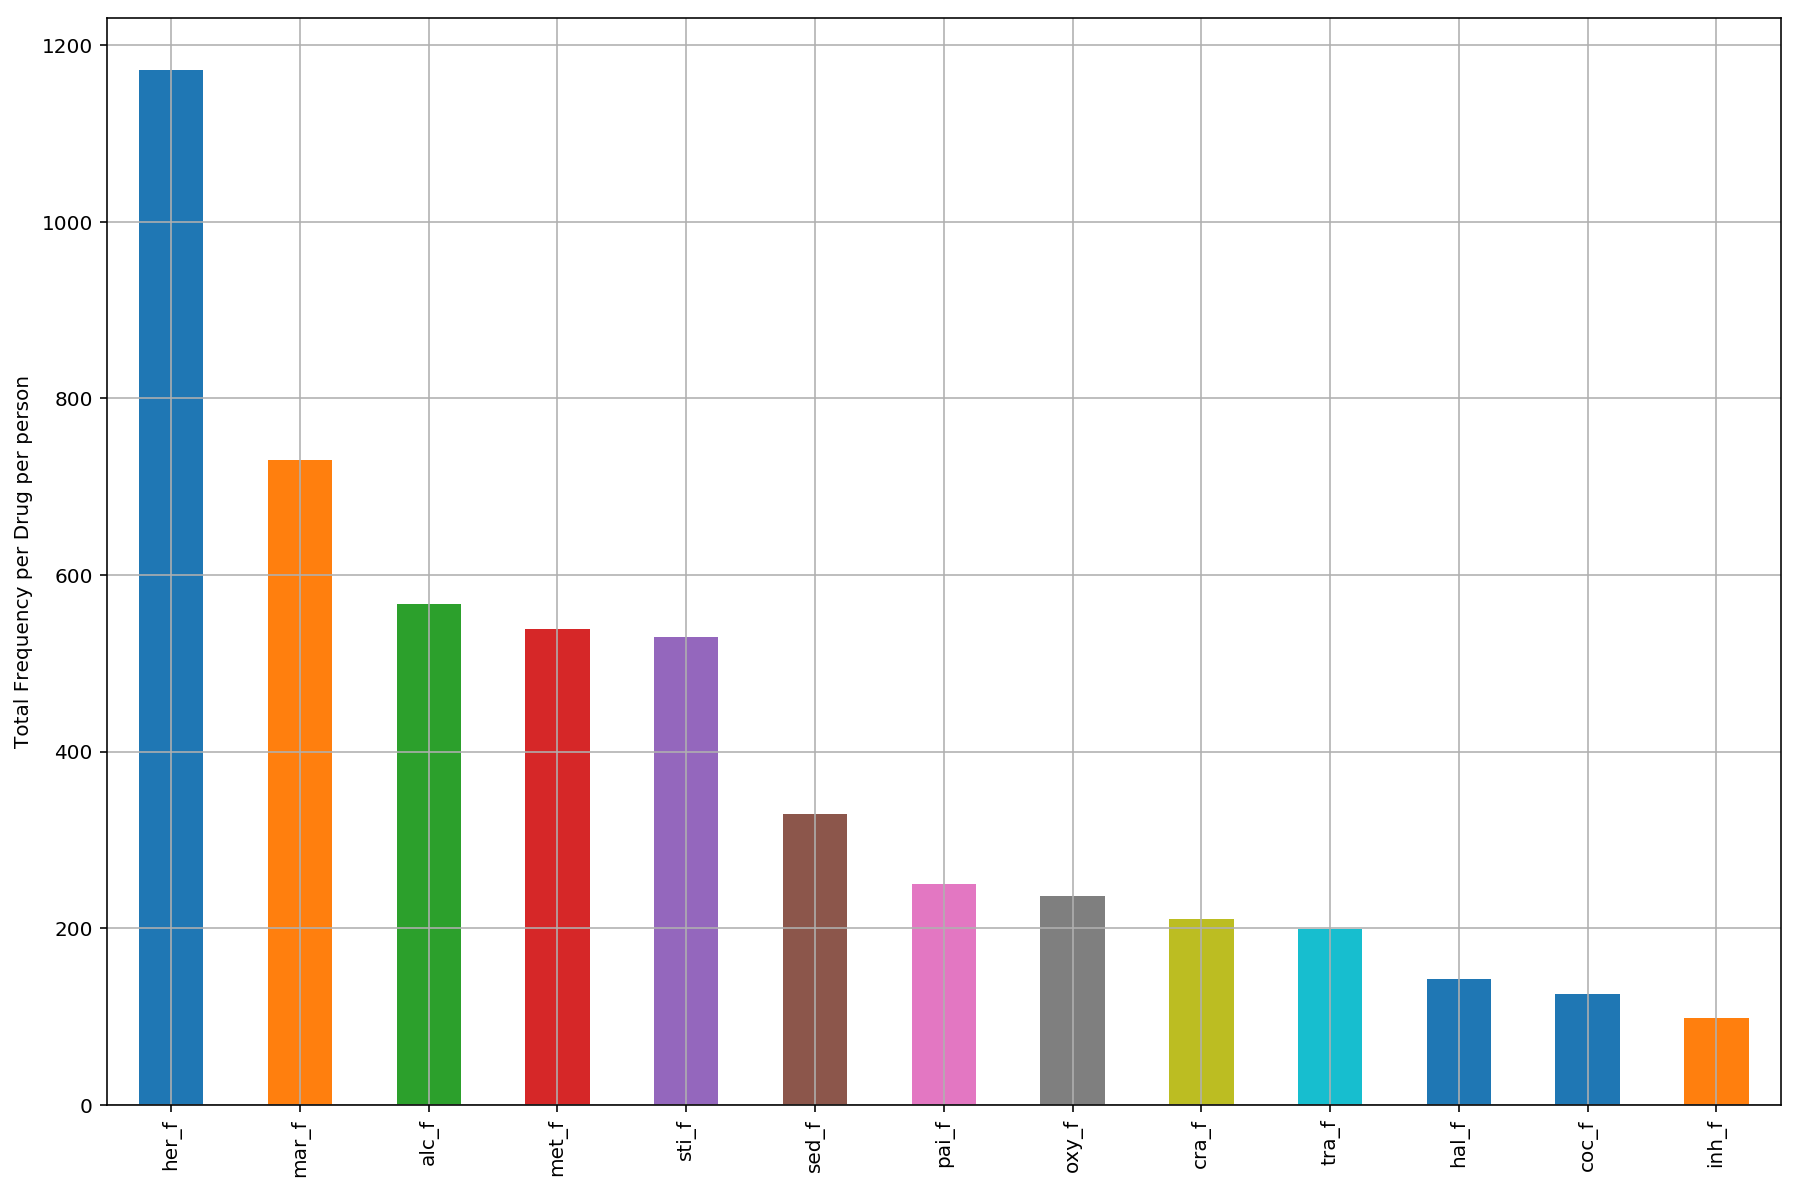

In [522]:
df = all_drugs_freq.loc[:, all_drugs_freq.columns != 'age'].sum().sort_values(ascending=False).plot(figsize=(15, 10), kind='bar', grid=True)
df.set_ylabel('Total Frequency per Drug per person')

### Trend for Drug Frequency per person by Age Group (Low-Volatility)

> Drugs that fall under this category generally enters a ranging frequency trend around age 18 - 20


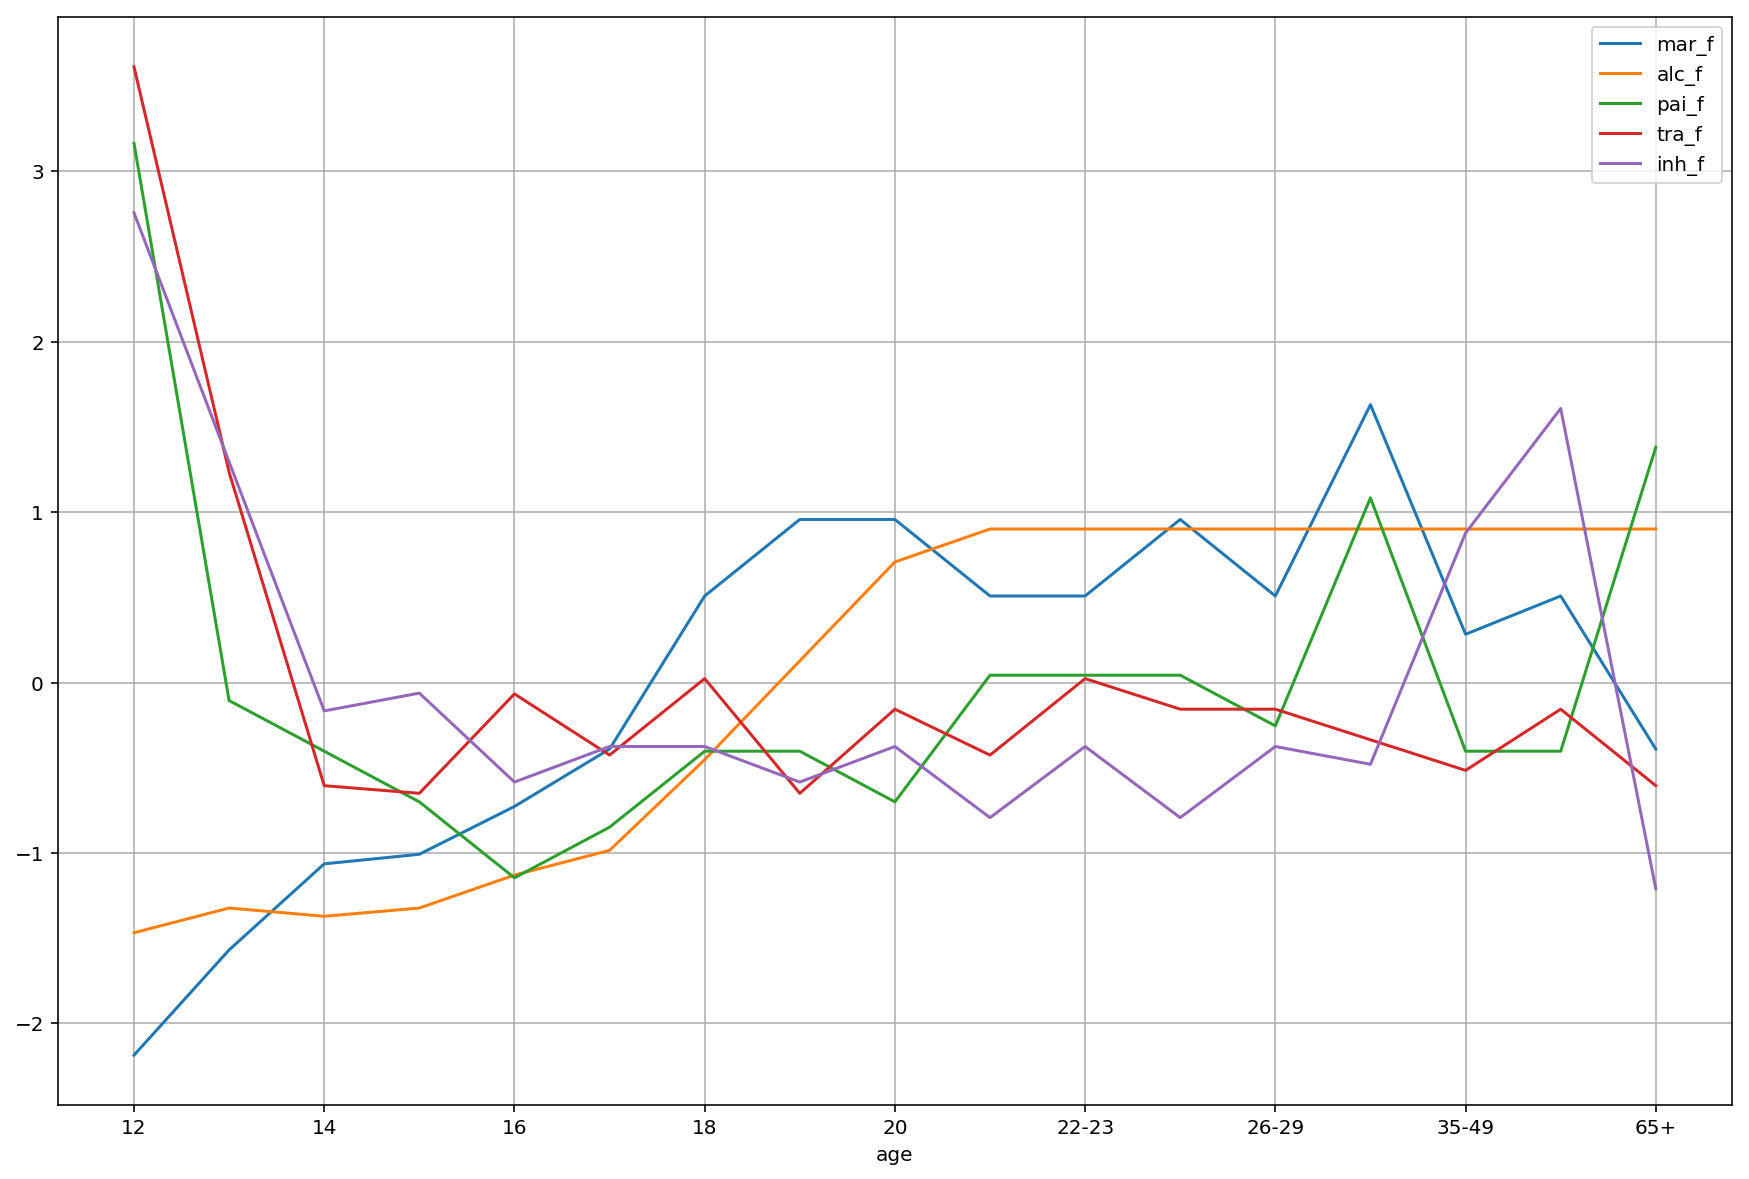

In [523]:
# drug frequency per person by age group
df = all_drugs_freq[['mar_f', 'alc_f', 'pai_f', 'tra_f', 'inh_f']].apply(scaling_data).plot(figsize=(15, 10), kind='line', grid=True)

### Observations for Drug Frequency per person by Age Group (High-Volatility)

> Drugs that fall under this category generally have huge spikes in frequency around ages 19, 22 - 23 and 30 - 65+ 


Text(0,0.5,u'Median number of times drug used per person')

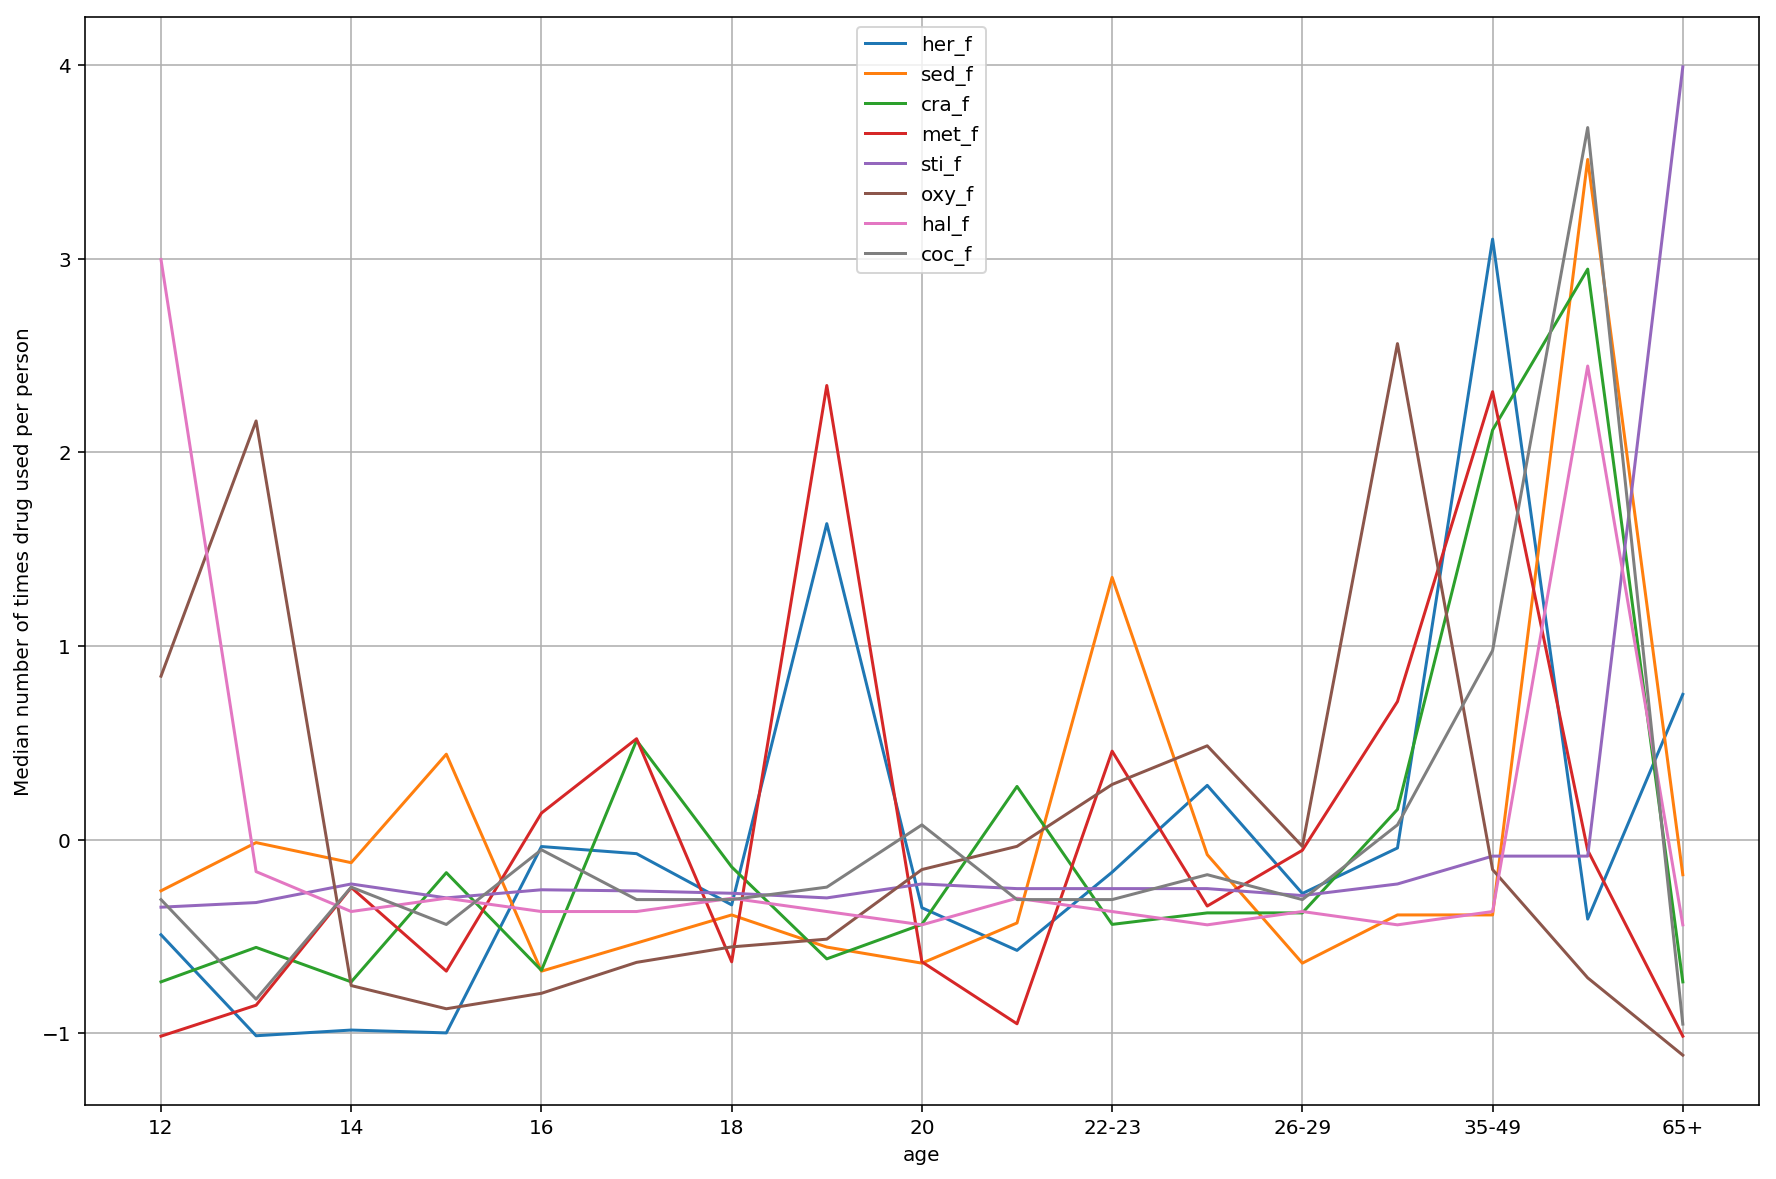

In [524]:
# drug frequency per person by age group
df = all_drugs_freq[['her_f', 'sed_f', 'cra_f', 'met_f', 'sti_f', 'oxy_f', 'hal_f', 'coc_f']].apply(scaling_data).plot(figsize=(15, 10), kind='line', grid=True)
df.set_ylabel('Median number of times drug used per person')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### Question & Null Hypothesis

> It is common belief that teenagers are more prone to drug abuse than adults. But is that really the case? **Does the age of a person has an affect on his likelihood of being a drug abuser?**

> To get to the bottom of this matter, we will attempt to find out whether there exists a **relationship** between the **number of minor drug users** and the **number of adult drug users** as age increases.

> **My null hypothesis is that no relationship exist between them or in other words, both are independent of each other**. If this is the case, then it goes to show that age has no effect on the likelihood of being a drug abuser.


In [525]:
# Segregate Data sets into Minor and Adult
minor_below_21 = all_drugs_uses_n.loc['12':'21',:].sum(axis=1).tolist()
adult_above_21 = all_drugs_uses_n.loc['22-23':,:].sum(axis=1).tolist()
# Reshape minor list so that length is equals to adult list
minor_subset = np.sum(age_below_21[-4:])
minor_below_21 = [x for x in age_below_21[:-4]]
minor_below_21.append(subset)
minor_age_groups = [str(x) for x in all_drugs_uses_n.loc['12':'17',:].index]
minor_age_groups.append('18-21')
adult_age_groups = [str(x) for x in all_drugs_uses_n.loc['22-23':,:].index]
minor_adult_drug_df = pd.DataFrame({'minor_drug_users':minor_below_21, 
                                    'adult_drug_users':adult_above_21,
                                   'minor_age':minor_age_groups,
                                   'adult_age':adult_age_groups})
minor_adult_drug_df

,adult_age,adult_drug_users,minor_age,minor_drug_users
0,22-23,4070.0,12,274.0
1,24-25,3823.0,13,515.0
2,26-29,3541.0,14,1049.0
3,30-34,3124.0,15,1668.0
4,35-49,2683.0,16,2297.0
5,50-64,2277.0,17,2898.0
6,65+,1439.0,18-21,15321.0


##### Scatter Plot between minor and adult

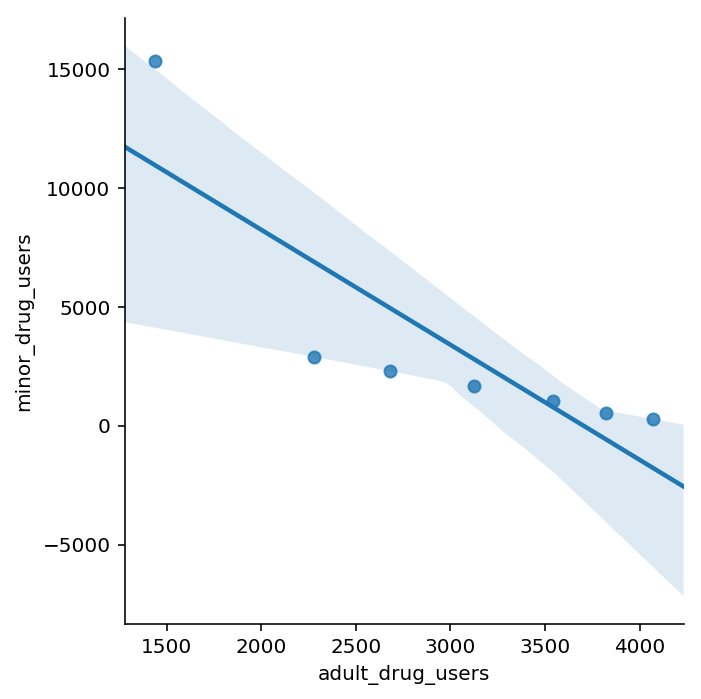

In [526]:
ss.lmplot(x='adult_drug_users', y='minor_drug_users', data=minor_adult_drug_df, scatter=True, fit_reg=True)

##### Show Heatmap between minor and adult

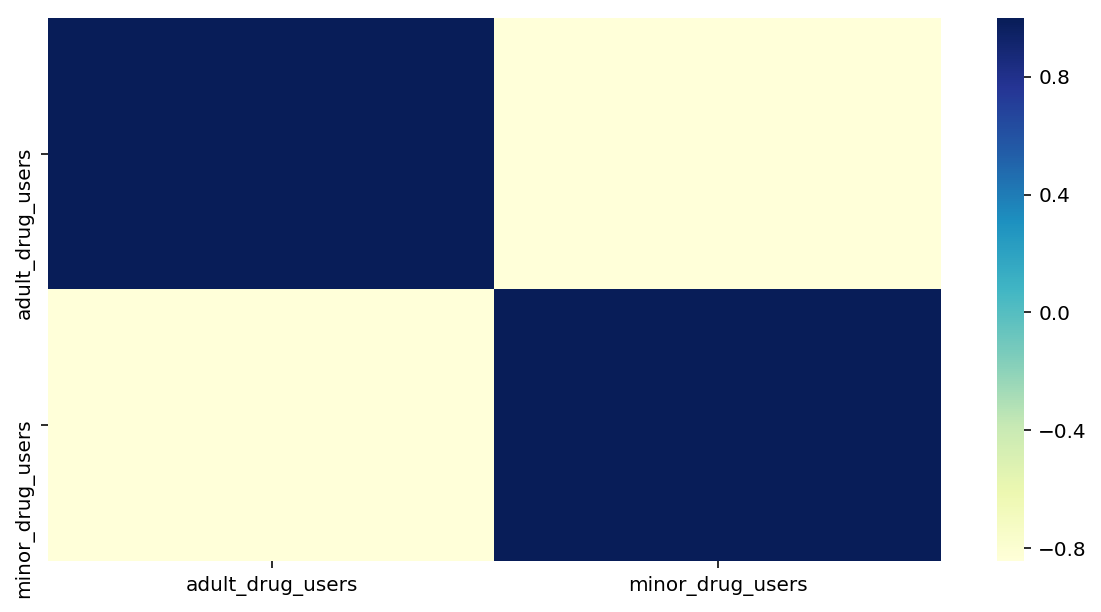

In [527]:
correlation_minor_adult = minor_adult_drug_df[['adult_drug_users', 'minor_drug_users']].corr()
fig, ax = plt.subplots(figsize=(10,5))
ss.heatmap(correlation_minor_adult, cmap='YlGnBu', ax=ax)

##### Hypothesis Test via Bootstraping

> 1. Get Sample Correlation
> 2. Generate 100,000 permutated replicates for *adult_drug_users*
> 3. Compute correlation between replicates and *minor_drug_users*
> 4. Get total count of replicate results that are at least as extreme as sample result
> 5. Get P-value by dividing it against the total number of replicates.

In [528]:
corr_val = correlation_minor_adult.loc['adult_drug_users', 'minor_drug_users']
corr_val

-0.84455750451091827

In [529]:
n = 100000
corr_perm_replicates = np.empty(n)

for x in range(n):
    adult_perm = np.random.permutation(minor_adult_drug_df['adult_drug_users'].tolist())
    corr_perm_replicates[x] = stats.pearsonr(adult_perm, minor_adult_drug_df['minor_drug_users'].tolist())[0]

p_val = corr_perm_replicates[corr_perm_replicates <= corr_val].size/float(n)
print('P-value = ' + str(p_val))

P-value = 0.00024


### Conclusion

> Since P-value < 0.05 significance level, we reject the null hypothesis that age does not have an affect on the likelihood of a person being a drug abuser.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### ANSWER

> No, there isn't. Outliers are observations that lie below *Q1 - (1.5 x IQR)* or above *Q3 + (1.5 x IQR)*.

In [530]:
rate_data = df_file['Rate'].sort_values()

In [531]:
IQR = 1.5 * (np.percentile(rate_data, 75) - np.percentile(rate_data, 25))
stats.iqr(rate_data)

54.5

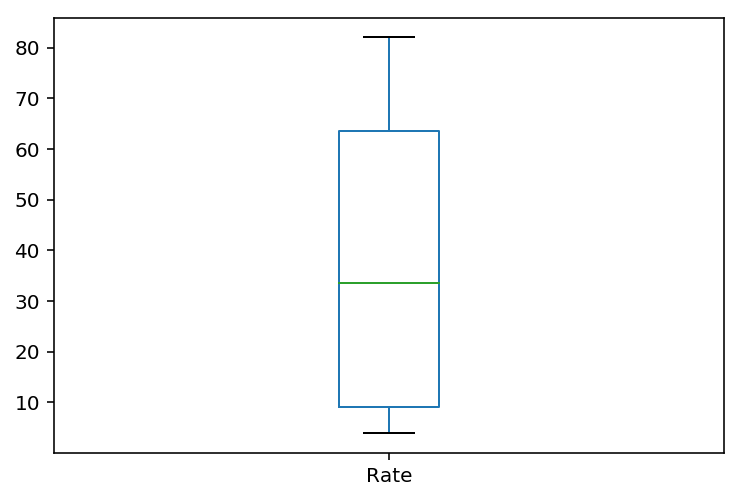

In [532]:
rate_data.plot(kind='box')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### ANSWER

> 1. Spearman correlation measures **rank order relationship** between variables and is **not affected by the difference in rate of change** between variables from raw data. pearson correlation measures the **linear relationship** between variables and is **affected by the difference in rate of change** between variables from raw data. The spearman correlation is also less sensitive to outliers as compared to pearson correlation because it limits the outlier's value to its rank.

> 2. Using 'Verbal' and 'Math' as examples, we first **find out how many datapoints there are in each data set**. In our case, both of them have 52 datapoints, therefore we **rank the highest value in each dataset as 52, lowest value as 1 and those in between accordingly. If there is a tie in values we will take the average of the ranks that they would have.** So for example if its 9 and 10, we rank both as 9.5. After which we apply the pearson correlation formula to the transformed rank order datasets.

In [533]:
# Calculate spearman using Scipy
stats.spearmanr(df_file[['Verbal']], df_file[['Math']])[0]

0.90520488479402839

In [534]:
# Calculate Spearman
df_verbal_rank = df_file[['Verbal']].rank()
df_math_rank = df_file[['Math']].rank()
stats.pearsonr(df_verbal_rank, df_math_rank)[0]

array([ 0.90520488])

In [535]:
# df_verbal_rank.rename(columns={'Verbal':'Verbal_Rank'}, inplace=True)
# df_verbal_rank['Verbal'] = df_file['Verbal']
# df_verbal_rank.sort_values('Verbal', ascending=False)

In [536]:
# Calculate Pearson R
stats.pearsonr(df_file[['Verbal']], df_file[['Math']])[0]

array([ 0.89987085])

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [537]:
def convert_perc(x):
    x_percentile = stats.percentileofscore(df_file['Rate'], x, kind='mean')
    return x_percentile

##### Convert Rate to Percentiles

In [538]:
df_file['Rate_Percentile'] = df_file['Rate'].map(convert_perc)
df_file.sort_values('Rate', ascending=False).head()

,State,Rate,Verbal,Math,Diff_verbal_math,Rate_Percentile
0,CT,82,509,510,1,99.038462
1,NJ,81,499,513,14,97.115385
2,MA,79,511,515,4,95.192308
3,NY,77,495,505,10,93.269231
4,NH,72,520,516,4,91.346154


##### Show percentile of California in Rate

In [539]:
df_file.loc[df_file['State'] == 'CA', df_file.columns == 'Rate_Percentile']

,Rate_Percentile
23,55.769231


##### How is percentile related to the spearman rank correlation

> Percentile gives rank to the raw data involved from 1 - 100, 1 being the lowest, 100 being the highest.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

##### Why might percentile scoring be useful for dealing with outliers?

> We are able to find out the 3 key values by conducting percentile scoring to a set of data: lower quartile(25%), median(50%) and upper quartile(75%). We can then identify outliers by getting the 1.5 times of interquartile range (upper quartile - lower quartile) and adding and subtracting it onto/from the upper and lower quartile respectively.  

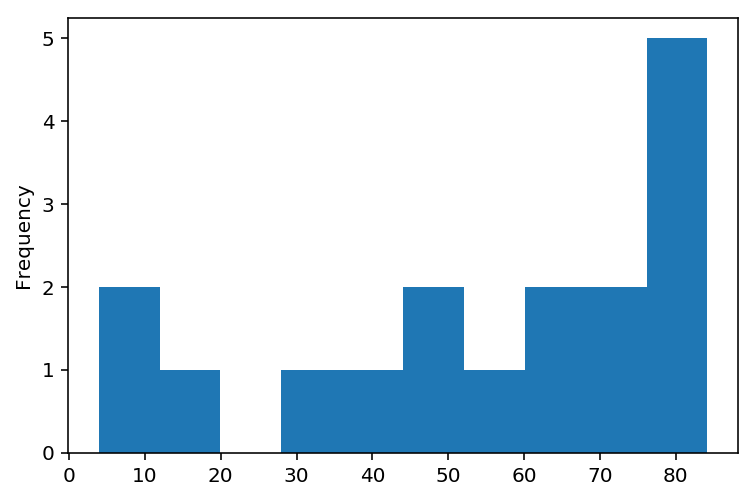

In [540]:
# Alcohol Used Variable which represents percentage of people that use alcohol
drug_df['alc_u'].plot(kind='hist')

In [541]:
def convert_perc(x):
    x_percentile = stats.percentileofscore(drug_df['alc_u'], x, kind='mean')
    return x_percentile

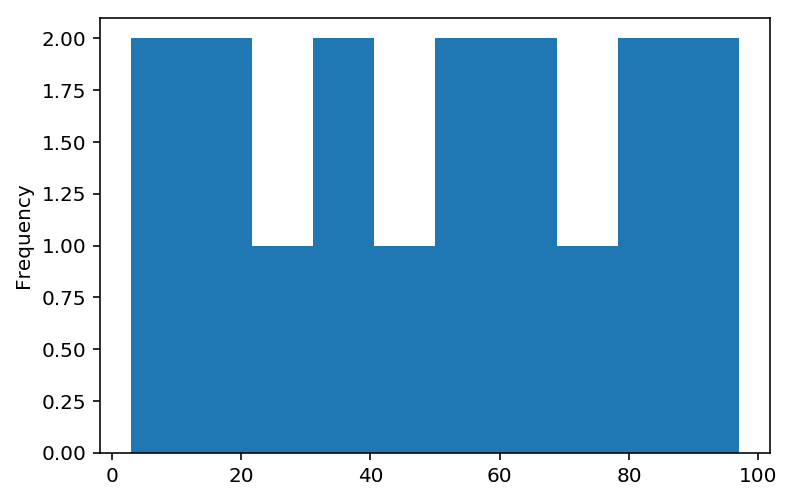

In [542]:
# Plot with percentile scored
drug_df_alc_u_percentile = drug_df['alc_u'].map(convert_perc)
drug_df_alc_u_percentile.plot(kind='hist')

##### Describe the effect, visually, of coverting raw scores to percentile.

> The histogram does not follow a bell like shape anymore, it is being transformed into a more uniformed and rectange / square like shape.